# Sommaire

[I. Préparation des données](#I.-Préparation-des-données)

[A. Importation des bibliothèques](#A.-Importation-des-bibliothèques)

[B. Importation et réorganisation des données](#B.-Importation-et-réorganisation-des-données)

[II. ACP et CAH](#II.-ACP-et-CAH)

[A. Analyse en composantes principales](#A.-Analyse-en-composantes-principales)

[B. Classification ascendante hiérarchique](#B.-Classification-ascendante-hiérarchique)

[C. Filtrage final](#C.-Filtrage-final)

[III. Statistiques inférentielles](#III.-Statistiques-inférentielles)

[A. Loi normale](#A.-Loi-normale)

[B. Tests statistiques](#B.-Tests-statistiques)

# I. Préparation des données

## A. Importation des bibliothèques

In [1]:
library(readr)
library(tidyverse)
library(reshape2)
library(stringr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v ggplot2 3.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



## B. Importation et réorganisation des données  

Les données de la FAO, pour le bilan alimentaire ne dépasse pas 2013, aussi elles ne dépasseront pas cette année pour cette analye.

Les données de l'année 2009 sont ajoutées pour faire des tendances. 

Importation et découverte tableaux de données : 

In [2]:
population_2012 = read_csv('/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/csv_telecharge/population_2012.csv')
population_2012 = tbl_df(population_2012)
head(population_2012)

Parsed with column specification:
cols(
  `Code Domaine` = col_character(),
  Domaine = col_character(),
  `Code zone` = col_double(),
  Zone = col_character(),
  `Code Élément` = col_double(),
  Élément = col_character(),
  `Code Produit` = col_double(),
  Produit = col_character(),
  `Code année` = col_double(),
  Année = col_double(),
  Unité = col_character(),
  Valeur = col_double(),
  Symbole = col_character(),
  `Description du Symbole` = col_character(),
  Note = col_character()
)


Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,30696.958,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"
OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,52998.213,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"
OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,2920.039,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"
OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,37565.847,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"
OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,81066.228,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"
OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2012,2012,1000 personnes,82.431,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"


In [3]:
population_2017 = read_csv('/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/csv_telecharge/population_2017.csv')
population_2017 = tbl_df(population_2017)
head(population_2017)

Parsed with column specification:
cols(
  `Code Domaine` = col_character(),
  Domaine = col_character(),
  `Code zone` = col_double(),
  Zone = col_character(),
  `Code Élément` = col_double(),
  Élément = col_character(),
  `Code Produit` = col_double(),
  Produit = col_character(),
  `Code année` = col_double(),
  Année = col_double(),
  Unité = col_character(),
  Valeur = col_double(),
  Symbole = col_character(),
  `Description du Symbole` = col_character(),
  Note = col_character()
)


Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,35530.081,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"
OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,56717.156,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"
OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2930.187,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"
OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41318.142,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"
OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82114.224,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"
OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,76.965,X,Sources internationales sûres,"UNDESA, Population Division – World Population Prospects, the 2017 Revision"


In [4]:
animaux = read_csv('/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/csv_telecharge/animaux.csv')
head(animaux)

Parsed with column specification:
cols(
  `Code Domaine` = col_character(),
  Domaine = col_character(),
  `Code Pays` = col_double(),
  Pays = col_character(),
  `Code Élément` = col_double(),
  Élément = col_character(),
  `Code Produit` = col_double(),
  Produit = col_character(),
  `Code Année` = col_double(),
  Année = col_double(),
  Unité = col_character(),
  Valeur = col_double(),
  Symbole = col_character(),
  `Description du Symbole` = col_character()
)


Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole
FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2009,2009,Milliers de tonnes,1.00,S,Données standardisées
FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2013,2013,Milliers de tonnes,6.00,S,Données standardisées
FBS,Bilans Alimentaires,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2731,Viande de Bovins,2009,2009,Kcal/personne/jour,29.00,Fc,Donnée calculée
FBS,Bilans Alimentaires,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2731,Viande de Bovins,2013,2013,Kcal/personne/jour,27.00,Fc,Donnée calculée
FBS,Bilans Alimentaires,2,Afghanistan,674,Disponibilité de protéines en quantité (g/personne/jour),2731,Viande de Bovins,2009,2009,g/personne/jour,2.03,Fc,Donnée calculée
FBS,Bilans Alimentaires,2,Afghanistan,674,Disponibilité de protéines en quantité (g/personne/jour),2731,Viande de Bovins,2013,2013,g/personne/jour,1.89,Fc,Donnée calculée


In [5]:
vegetaux = read_csv('/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/csv_telecharge/vegetaux.csv')
head(vegetaux)

Parsed with column specification:
cols(
  `Code Domaine` = col_character(),
  Domaine = col_character(),
  `Code Pays` = col_double(),
  Pays = col_character(),
  `Code Élément` = col_double(),
  Élément = col_character(),
  `Code Produit` = col_double(),
  Produit = col_character(),
  `Code Année` = col_double(),
  Année = col_double(),
  Unité = col_character(),
  Valeur = col_double(),
  Symbole = col_character(),
  `Description du Symbole` = col_character()
)


Code Domaine,Domaine,Code Pays,Pays,Code Élément,Élément,Code Produit,Produit,Code Année,Année,Unité,Valeur,Symbole,Description du Symbole
FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2009,2009,Milliers de tonnes,1861.00,S,Données standardisées
FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2511,Blé,2013,2013,Milliers de tonnes,1173.00,S,Données standardisées
FBS,Bilans Alimentaires,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2511,Blé,2009,2009,Kcal/personne/jour,1400.00,Fc,Donnée calculée
FBS,Bilans Alimentaires,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2511,Blé,2013,2013,Kcal/personne/jour,1369.00,Fc,Donnée calculée
FBS,Bilans Alimentaires,2,Afghanistan,674,Disponibilité de protéines en quantité (g/personne/jour),2511,Blé,2009,2009,g/personne/jour,37.75,Fc,Donnée calculée
FBS,Bilans Alimentaires,2,Afghanistan,674,Disponibilité de protéines en quantité (g/personne/jour),2511,Blé,2013,2013,g/personne/jour,36.91,Fc,Donnée calculée


In [6]:
pib_habitant_2017 = read_csv('C:/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/csv_telecharge/pib_habitant_2017.csv')
pib_habitant_2017 = tbl_df(pib_habitant_2017)
head(pib_habitant_2017)

Parsed with column specification:
cols(
  `Code Domaine` = col_character(),
  Domaine = col_character(),
  `Code zone` = col_double(),
  Zone = col_character(),
  `Code Élément` = col_double(),
  Élément = col_character(),
  `Code Produit` = col_double(),
  Produit = col_character(),
  `Code année` = col_double(),
  Année = col_double(),
  Unité = col_logical(),
  Valeur = col_double(),
  Symbole = col_character(),
  `Description du Symbole` = col_character(),
  Note = col_logical()
)


Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
MK,Indicateurs macro,2,Afghanistan,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,618.990,Fc,Donnée calculée,NA
MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,6151.087,Fc,Donnée calculée,NA
MK,Indicateurs macro,3,Albanie,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,4450.008,Fc,Donnée calculée,NA
MK,Indicateurs macro,4,Algérie,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,4055.247,Fc,Donnée calculée,NA
MK,Indicateurs macro,79,Allemagne,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,44976.426,Fc,Donnée calculée,NA
MK,Indicateurs macro,6,Andorre,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,39152.812,Fc,Donnée calculée,NA


In [7]:
stab_politique_2016 = read_csv('C:/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/csv_telecharge/stab_politique_2016.csv')
stab_politique_2016 = tbl_df(stab_politique_2016)
head(stab_politique_2016)

Parsed with column specification:
cols(
  `Code Domaine` = col_character(),
  Domaine = col_character(),
  `Code zone` = col_double(),
  Zone = col_character(),
  `Code Élément` = col_double(),
  Élément = col_character(),
  `Code Produit` = col_double(),
  Produit = col_character(),
  `Code année` = col_double(),
  Année = col_double(),
  Unité = col_character(),
  Valeur = col_double(),
  Symbole = col_character(),
  `Description du Symbole` = col_character()
)


Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/terrorisme (indice),2016,2016,indice,-2.75,X,Sources internationales sûres
FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/terrorisme (indice),2016,2016,indice,-0.13,X,Sources internationales sûres
FS,Données de la sécurité alimentaire,3,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/terrorisme (indice),2016,2016,indice,0.26,X,Sources internationales sûres
FS,Données de la sécurité alimentaire,4,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/terrorisme (indice),2016,2016,indice,-1.14,X,Sources internationales sûres
FS,Données de la sécurité alimentaire,79,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/terrorisme (indice),2016,2016,indice,0.76,X,Sources internationales sûres
FS,Données de la sécurité alimentaire,6,Andorre,6125,Valeur,21032,Stabilité politique et absence de violence/terrorisme (indice),2016,2016,indice,1.40,X,Sources internationales sûres


In [8]:
distance = read_csv("C:/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/csv_telecharge/distances.csv")
distance = tbl_df(distance)
head(distance)

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character(),
  GIB = col_character(),
  NZL = col_character(),
  PRY = col_character(),
  TWN = col_character()
)
See spec(...) for full column specifications.


X1,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,...,VCT,VEN,VNM,VUT,WLF,WSM,YEM,ZAF,ZMB,ZWE
ABW,0.0000,13252.563,9500.725,973.5351,9085.425,7565.415,12767.098,5360.114,11105.217,...,953.2176,407.2542,17394.631,13764.07,12057.32,11596.23,12153.647,10635.960,11252.792,11587.660
AFG,13252.5626,0.000,7592.696,12295.4023,4344.887,5809.607,1685.265,15269.258,2264.596,...,12582.3126,13213.1017,4615.406,11930.66,13090.90,13527.16,3279.106,9242.213,7017.608,7060.695
AGO,9500.7247,7592.696,0.000,8894.7900,5594.946,5808.941,5917.159,7777.931,6309.127,...,8581.3134,9127.1524,10567.406,16001.48,17350.88,17438.15,4339.162,2828.661,1791.381,2169.266
AIA,973.5351,12295.402,8894.790,0.0000,8111.936,6591.883,11797.582,5867.656,10134.036,...,593.1990,949.1654,16601.575,14610.03,12882.44,12434.63,11234.495,10369.918,10679.300,11038.903
ALB,9085.4254,4344.887,5594.946,8111.9361,0.000,1520.616,3718.578,11591.280,2082.227,...,8313.2023,8974.8655,8960.200,16037.39,16534.51,16759.48,3714.765,8333.607,6341.330,6650.773
AND,7565.4145,5809.607,5808.941,6591.8828,1520.616,0.000,5232.161,10491.126,3568.907,...,6803.9530,7460.7394,10413.743,16990.04,16757.26,16761.78,5054.903,8637.352,6973.880,7335.131


In [9]:
countries_codes = read_csv("C:/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/csv_telecharge/countries_codes_and_coordinates.csv")
countries_codes = tbl_df(countries_codes)
head(countries_codes)

Parsed with column specification:
cols(
  Pays = col_character(),
  ISO2 = col_character(),
  ISO3 = col_character(),
  ISOON = col_character()
)
Warning message:
"4 parsing failures.
row col  expected    actual                                                                                                                           file
 23  -- 4 columns 3 columns 'C:/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/csv_telecharge/countries_codes_and_coordinates.csv'
 29  -- 4 columns 3 columns 'C:/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/csv_telecharge/countries_codes_and_coordinates.csv'
217  -- 4 columns 5 columns 'C:/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/csv_telecharge/countries_codes_and_coordinates.csv'
219  -- 4 columns 5 columns 'C:/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/csv_telecharge/countries_codes_and_coordinates.csv'
"

Pays,ISO2,ISO3,ISOON
Afghanistan,AF,AFG,004
Îles Aland,AX,ALA,248
Albanie,AL,ALB,008
Algérie,DZ,DZA,012
Samoa américaines,AS,ASM,016
Andorre,AD,ET,020


In [10]:
change_2009 = read_csv("C:/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/csv_telecharge/change_2009.csv")
change_2009 = tbl_df(change_2009)
head(change_2009)

Parsed with column specification:
cols(
  `Code Domaine` = col_character(),
  Domaine = col_character(),
  `Code zone` = col_double(),
  Zone = col_character(),
  `Code de devise ISO` = col_character(),
  Devise = col_character(),
  `Code Produit` = col_double(),
  Produit = col_character(),
  `Code année` = col_double(),
  Année = col_double(),
  Unité = col_logical(),
  Valeur = col_double(),
  Symbole = col_character(),
  `Description du Symbole` = col_character(),
  Note = col_character()
)


Code Domaine,Domaine,Code zone,Zone,Code de devise ISO,Devise,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
PE,Taux de change - Annuels,2,Afghanistan,AFN,Afghani,5540,Unités de monnaie locale standardisée par USD,2009,2009,NA,50.3250,X,Sources internationales sûres,Data from UNSD AMA
PE,Taux de change - Annuels,202,Afrique du Sud,ZAR,Rand,5540,Unités de monnaie locale standardisée par USD,2009,2009,NA,8.4737,X,Sources internationales sûres,Data from UNSD AMA
PE,Taux de change - Annuels,3,Albanie,ALL,Lek,5540,Unités de monnaie locale standardisée par USD,2009,2009,NA,94.9781,X,Sources internationales sûres,Data from UNSD AMA
PE,Taux de change - Annuels,4,Algérie,DZD,Algerian Dinar,5540,Unités de monnaie locale standardisée par USD,2009,2009,NA,72.6474,X,Sources internationales sûres,Data from UNSD AMA
PE,Taux de change - Annuels,79,Allemagne,EUR,Euro,5540,Unités de monnaie locale standardisée par USD,2009,2009,NA,0.7198,X,Sources internationales sûres,Data from UNSD AMA
PE,Taux de change - Annuels,6,Andorre,EUR,Euro,5540,Unités de monnaie locale standardisée par USD,2009,2009,NA,0.7198,X,Sources internationales sûres,Data from UNSD AMA


In [11]:
change_2013 = read_csv("C:/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/csv_telecharge/change_2013.csv")
change_2013 = tbl_df(change_2013)
head(change_2013)

Parsed with column specification:
cols(
  `Code Domaine` = col_character(),
  Domaine = col_character(),
  `Code zone` = col_double(),
  Zone = col_character(),
  `Code de devise ISO` = col_character(),
  Devise = col_character(),
  `Code Produit` = col_double(),
  Produit = col_character(),
  `Code année` = col_double(),
  Année = col_double(),
  Unité = col_logical(),
  Valeur = col_double(),
  Symbole = col_character(),
  `Description du Symbole` = col_character(),
  Note = col_character()
)


Code Domaine,Domaine,Code zone,Zone,Code de devise ISO,Devise,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
PE,Taux de change - Annuels,2,Afghanistan,AFN,Afghani,5540,Unités de monnaie locale standardisée par USD,2013,2013,NA,55.3775,X,Sources internationales sûres,Data from UNSD AMA
PE,Taux de change - Annuels,202,Afrique du Sud,ZAR,Rand,5540,Unités de monnaie locale standardisée par USD,2013,2013,NA,9.6551,X,Sources internationales sûres,Data from UNSD AMA
PE,Taux de change - Annuels,3,Albanie,ALL,Lek,5540,Unités de monnaie locale standardisée par USD,2013,2013,NA,105.6687,X,Sources internationales sûres,Data from UNSD AMA
PE,Taux de change - Annuels,4,Algérie,DZD,Algerian Dinar,5540,Unités de monnaie locale standardisée par USD,2013,2013,NA,79.3684,X,Sources internationales sûres,Data from UNSD AMA
PE,Taux de change - Annuels,79,Allemagne,EUR,Euro,5540,Unités de monnaie locale standardisée par USD,2013,2013,NA,0.7532,X,Sources internationales sûres,Data from UNSD AMA
PE,Taux de change - Annuels,6,Andorre,EUR,Euro,5540,Unités de monnaie locale standardisée par USD,2013,2013,NA,0.7532,X,Sources internationales sûres,Data from UNSD AMA


Jointure du tableaux contenant les codes pays avec celui contenant la distance entre les pays, afin de pouvoir faire le lien entre le code d'un pays, son nom et sa distance, en particulier avec la France : 

In [12]:
countries_distance = left_join(select(countries_codes,Pays,ISO3) , distance, by = c("ISO3" = "X1"), copy = FALSE)
countries_distance = select(countries_distance,Pays, FRA) 
countries_distance = countries_distance %>% rename(pays = Pays, distance_france_km = FRA)
head(countries_distance)

pays,distance_france_km
Afghanistan,5594.223
Îles Aland,NA
Albanie,1603.945
Algérie,1345.460
Samoa américaines,16117.699
Andorre,NA


Création d'une variable "origine" pour distinguer le végétaux et les animaux :

In [13]:
animaux["origine"] = "animale"
vegetaux["origine"] = "vegetale"

Union des tableaux "animaux" et "vegetaux" et transformation en colonnes des variables de la colonne "Élément" :

In [14]:
produits <- bind_rows(animaux,vegetaux)
produits = tbl_df(produits)
produits = dcast(produits, Pays+Produit+Année+origine  ~ Élément,fun.aggregate = sum,  value.var = "Valeur")
head(produits)

Pays,Produit,Année,origine,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité
Afghanistan,Abats Comestible,2009,animale,6,0.81,0
Afghanistan,Abats Comestible,2013,animale,5,0.77,0
Afghanistan,"Agrumes, Autres",2009,vegetale,0,0.00,0
Afghanistan,"Agrumes, Autres",2013,vegetale,1,0.02,40
Afghanistan,Aliments pour enfants,2009,vegetale,0,0.02,1
Afghanistan,Aliments pour enfants,2013,vegetale,1,0.03,2


Nous nous occupons désormais de calculer la différence de population entre 2012 et 2017 :

In [15]:
population = left_join(select(population_2012,Zone,Valeur),select(population_2017,Zone,Valeur),by = c("Zone" = "Zone"), copy = FALSE)
population['population_diff_2012_2017'] = population['Valeur.y'] - population['Valeur.x']
population = select(population,Zone,population_diff_2012_2017)

Nous procédons à la détermination des __clefs primaires__ des différents tableaux en commençant par chercher d'éventuelles __valeurs manquantes__ : 

In [16]:
produits %>%
  summarise(count = sum(is.na(produits)))

pib_habitant_2017 %>%
  summarise(count = sum(is.na(pib_habitant_2017)))

stab_politique_2016 %>%
  summarise(count = sum(is.na(stab_politique_2016)))

population %>%
  summarise(count = sum(is.na(population)))

count
0


count
418


count
0


count
0


In [17]:
pib_habitant_2017[rowSums(is.na(pib_habitant_2017)) > 0,]


Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
MK,Indicateurs macro,2,Afghanistan,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,618.990,Fc,Donnée calculée,NA
MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,6151.087,Fc,Donnée calculée,NA
MK,Indicateurs macro,3,Albanie,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,4450.008,Fc,Donnée calculée,NA
MK,Indicateurs macro,4,Algérie,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,4055.247,Fc,Donnée calculée,NA
MK,Indicateurs macro,79,Allemagne,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,44976.426,Fc,Donnée calculée,NA
MK,Indicateurs macro,6,Andorre,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,39152.812,Fc,Donnée calculée,NA
MK,Indicateurs macro,7,Angola,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,4247.411,Fc,Donnée calculée,NA
MK,Indicateurs macro,258,Anguilla,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,18860.694,Fc,Donnée calculée,NA
MK,Indicateurs macro,8,Antigua-et-Barbuda,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,14803.011,Fc,Donnée calculée,NA
MK,Indicateurs macro,194,Arabie saoudite,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2017,2017,NA,20760.906,Fc,Donnée calculée,NA


Les valeurs manquantes pour la tableau "pib_habitant_2017"  ne sont pas problèmatiques car elles concernent des variables dont nous ne ferons pas usage, les variables "Unité" et "Note". 

Nous vérifions désormais que nos __clefs candidates__ n'ont pas de __doublon__ : 

In [18]:
produits %>%
  summarise(count = sum(duplicated(select(produits,Produit,Pays,Année))))
# Nous testons l'absence de doublon pour la clef candidate "Produit,Pays,Année", pour le tableau "produits"

pib_habitant_2017 %>%
  summarise(count = sum(duplicated(select(pib_habitant_2017,Zone,Année))))
# Nous testons l'absence de doublon pour la clef candidate "Zone,Année", pour le tableau "pib_habitant_2017"


stab_politique_2016 %>%
  summarise(count = sum(duplicated(select(stab_politique_2016,Zone,Année))))
# Nous testons l'absence de doublon pour la clef candidate "Zone,Année", pour le tableau "produits"

population %>%
  summarise(count = sum(duplicated(population)))
# Nous testons l'absence de doublon pour la clef candidate "Zone,Année", pour le tableau "population"

count
0


count
0


count
0


count
0


Nous ne constatons __aucun doublon__. 

Il faut désormais formater les colonnes et convertir les unitées en vue d'une __jointure__. Nous ne traiterons que les colonnes qui seront utilisées dans le nouveau tableau. 

In [19]:
produits['Disponibilité de protéines en quantité (g/personne/jour)'] = 1000 * produits['Disponibilité de protéines en quantité (g/personne/jour)']
#conversion des grammes aux kilos 

produits['Importations - Quantité'] = 1000 * produits['Importations - Quantité']
#conversion du millier de tonnes aux tonnes

produits = produits %>% rename(pays = Pays, produit = Produit, annee = "Année", dispo_alim_kcal_pers_jour = "Disponibilité alimentaire (Kcal/personne/jour)", dispo_prot_kg_pers_jour = "Disponibilité de protéines en quantité (g/personne/jour)", import_tonnes = "Importations - Quantité")
#changement du nom des colonnes 

produits = select(produits,pays,annee,produit,origine,dispo_alim_kcal_pers_jour,dispo_prot_kg_pers_jour,import_tonnes)
#changement de l'ordre des colonnes

In [20]:
stab_politique_2016 = stab_politique_2016 %>% rename(pays = Zone, annee = "Année", indice_stab_polit_et_secur_2016 = Valeur)

In [21]:
pib_habitant_2017 = pib_habitant_2017 %>% rename(pays = Zone, annee = "Année", pib_habitant_2017_dollars = Valeur) 

In [22]:
population['population_diff_2012_2017'] = 1000 * population['population_diff_2012_2017']
#conversion du millier d'habitants à l'individu

population = population %>% rename(pays = Zone)

In [23]:
change_2009 = change_2009 %>%  mutate(Valeur = Valeur * 1/0.7198)
#modification pour obtenir le change avec les euros pour 2013

change_2013 = change_2013 %>%  mutate(Valeur = Valeur * 1/0.7532)
#modification pour obtenir le change avec les euros pour 2018

variation_change_euros_2009_2013 = left_join(select(change_2009, Zone,Année,Devise,Valeur), select(change_2013, Zone,Année,Devise,Valeur), by = c("Zone"="Zone"), copy = FALSE)
#jointure des deux tableaux

variation_change_euros_2009_2013['taux_variation_change_euros_2009_2013'] = round(100 * (variation_change_euros_2009_2013['Valeur.y'] - variation_change_euros_2009_2013['Valeur.x'])/variation_change_euros_2009_2013['Valeur.x'],2)
#création d'une colonne pour le taux d'évolution du change avec l'euro

head(variation_change_euros_2009_2013)

Zone,Année.x,Devise.x,Valeur.x,Année.y,Devise.y,Valeur.y,taux_variation_change_euros_2009_2013
Afghanistan,2009,Afghani,69.91525,2013,Afghani,73.52297,5.16
Afrique du Sud,2009,Rand,11.77230,2013,Rand,12.81877,8.89
Albanie,2009,Lek,131.95068,2013,Lek,140.29302,6.32
Algérie,2009,Algerian Dinar,100.92720,2013,Algerian Dinar,105.37493,4.41
Allemagne,2009,Euro,1.00000,2013,Euro,1.00000,0.00
Andorre,2009,Euro,1.00000,2013,Euro,1.00000,0.00


La variation du taux de change présente l'avantage d'offrir une tendance sur la durée contrairement à celle du PIB pour une année. 

Le taux de change condtionne fortement les importations et les exportations entre pays. 

In [24]:
import_diff_2009 = filter(produits, annee == '2009',produit == 'Viande de Volailles',import_tonnes > 0)
import_diff_2009 =select(import_diff_2009, pays, annee, produit, import_tonnes)

import_diff_2013 = filter(produits, annee == '2013', produit == 'Viande de Volailles')
import_diff_2013 = select(import_diff_2013, pays,annee, produit, import_tonnes)

import_diff = left_join(import_diff_2009, import_diff_2013, by = c("pays"="pays"), copy = FALSE)

import_diff['diff'] = import_diff['import_tonnes.y'] - import_diff['import_tonnes.x']

import_diff['import_taux_evolution_2009_2013'] = round((100 * (import_diff['import_tonnes.y'] - import_diff['import_tonnes.x']) / import_diff['import_tonnes.x']),2)

Finalisation et jointure des tableaux : 

In [25]:
prot = produits %>% filter(annee == '2013') %>% select(pays, dispo_prot_kg_pers_jour) 
prot = prot %>% group_by(pays) %>%  summarise(dispo_prot_pers_jour = sum(dispo_prot_kg_pers_jour))

prot_an = produits %>% filter(annee == '2013',origine == "animale") %>% select(pays, dispo_prot_kg_pers_jour) 
prot_an = prot_an %>% group_by(pays) %>%  summarise(dispo_prot_ani_pers_jour = sum(dispo_prot_kg_pers_jour))

prot = left_join(prot, prot_an, by = c("pays"="pays"), copy = FALSE)
prot['ratio_prot_animal_prot_total_2013'] = round(100 * prot['dispo_prot_ani_pers_jour'] / prot['dispo_prot_pers_jour'],2)

prot['dispo_prot_kg_pers_an_2013'] = prot['dispo_prot_pers_jour'] * 365

prot = prot %>% select(pays,dispo_prot_kg_pers_an_2013, ratio_prot_animal_prot_total_2013)

kcal = produits %>% filter(annee == '2013') %>% select(pays, dispo_alim_kcal_pers_jour) 
kcal = kcal %>% group_by(pays) %>%  summarise(dispo_kcal_pers_an_2013 = sum(dispo_alim_kcal_pers_jour) * 365)

etude_marche = left_join(prot, kcal, by = c("pays"="pays"), copy = FALSE)

etude_marche = left_join(etude_marche, population, by = c("pays"="pays"), copy = FALSE)

etude_marche = left_join(etude_marche, select(pib_habitant_2017,pays,pib_habitant_2017_dollars), by = c("pays"="pays"), copy = FALSE)

etude_marche = left_join(etude_marche, select(stab_politique_2016,pays,indice_stab_polit_et_secur_2016) , by = c("pays"="pays"), copy = FALSE)

etude_marche = left_join(etude_marche, select(countries_distance,pays, distance_france_km), by = c("pays"="pays"), copy = FALSE)

etude_marche = left_join(etude_marche, select(import_diff,pays,import_taux_evolution_2009_2013), by = c("pays"="pays"))

etude_marche = left_join(etude_marche, select(variation_change_euros_2009_2013,Zone,taux_variation_change_euros_2009_2013), by = c("pays"="Zone"))

etude_marche = filter(etude_marche, pays != "France")

etude_marche['distance_france_km'] = etude_marche['distance_france_km'] * -1
# les exportations sont plus cher vers des pays loins de la France

etude_marche['taux_variation_change_euros_2009_2013'] = etude_marche['taux_variation_change_euros_2009_2013'] * -1
# plus la monnaie du pays importateur est faible par rapport à l'euro, plus les importations sont coûteuses

etude_marche <- column_to_rownames(etude_marche, 'pays')
#permet d'indexer par une colonne le tableau

head(etude_marche)

nrow(etude_marche)
#pour afficher le nombre de pays

,dispo_prot_kg_pers_an_2013,ratio_prot_animal_prot_total_2013,dispo_kcal_pers_an_2013,population_diff_2012_2017,pib_habitant_2017_dollars,indice_stab_polit_et_secur_2016,distance_france_km,import_taux_evolution_2009_2013,taux_variation_change_euros_2009_2013
Afghanistan,21264900,20.96,761755,4833123,618.990,-2.75,-5594.2234,108.70,-5.16
Afrique du Sud,31145450,42.65,1102300,3718943,6151.087,-0.13,-9306.6385,68.72,-8.89
Albanie,40650050,53.34,1163620,10148,4450.008,0.26,-1603.9445,-3.85,-6.32
Algérie,33550800,27.18,1201945,3752295,4055.247,-1.14,-1345.4604,200.00,-4.41
Allemagne,37007350,60.65,1278595,1047996,44976.426,0.76,-880.6348,16.57,0.00
Angola,20903550,32.13,903010,4688043,4247.411,-0.39,-6478.9539,112.42,-16.27


[1] 170

# II. ACP et CAH

## A. Analyse en composantes principales

Installation de paquets et de librairies supplémentaires : 

In [26]:
library("FactoMineR")
library("factoextra")

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [27]:
etude_marche_pca = PCA(etude_marche,  scale.unit = TRUE, graph = TRUE)
print(etude_marche_pca)
# scale.unit = TRUE permet de standardiser les données. Elles sont alors centrées-réduites

ind <- get_pca_ind(etude_marche_pca)
# permet d'obtenir un ensemble de résultats pour les individus étudiées pour l'APC

var <- get_pca_var(etude_marche_pca)
# permet d'obtenir un ensemble de résultats pour les variables étudiées pour l'APC

Warning message in PCA(etude_marche, scale.unit = TRUE, graph = TRUE):
"Missing values are imputed by the mean of the variable: you should use the imputePCA function of the missMDA package"

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 170 individuals, described by 9 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

Mesurent de la quantité de variance expliquée par chaque axe principal :

In [28]:
get_eigenvalue(etude_marche_pca)


,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,3.5902211,39.891345,39.89135
Dim.2,1.3296100,14.773444,54.66479
Dim.3,1.0158336,11.287040,65.95183
Dim.4,0.9423307,10.470341,76.42217
Dim.5,0.8312727,9.236363,85.65853
Dim.6,0.5396344,5.995937,91.65447
Dim.7,0.3572161,3.969067,95.62354
Dim.8,0.2900601,3.222890,98.84643
Dim.9,0.1038215,1.153572,100.00000


La quantité de variance expliquée par chaque composante principale est mesurée par ce que l’on appelle valeur propre.

Nos données sont normalisées, or, nous constatons 4 valeurs propre supérieures à 10%, et elles représentent environ 76,42 % de la variance totale en cumulé. 

Ici nous avons 9 variables, 9 dimensions, la valeur propre cumulée est donc de 9.

Généralement la valeur seuil de 10% est prise ou une valeur cumulée de 70% lorsque l'on classe les axes principaux par ordre de de valeur propre. 

On peut modéliser la valeur propre de chaque axe principal de plusieurs façons :

png 
  2

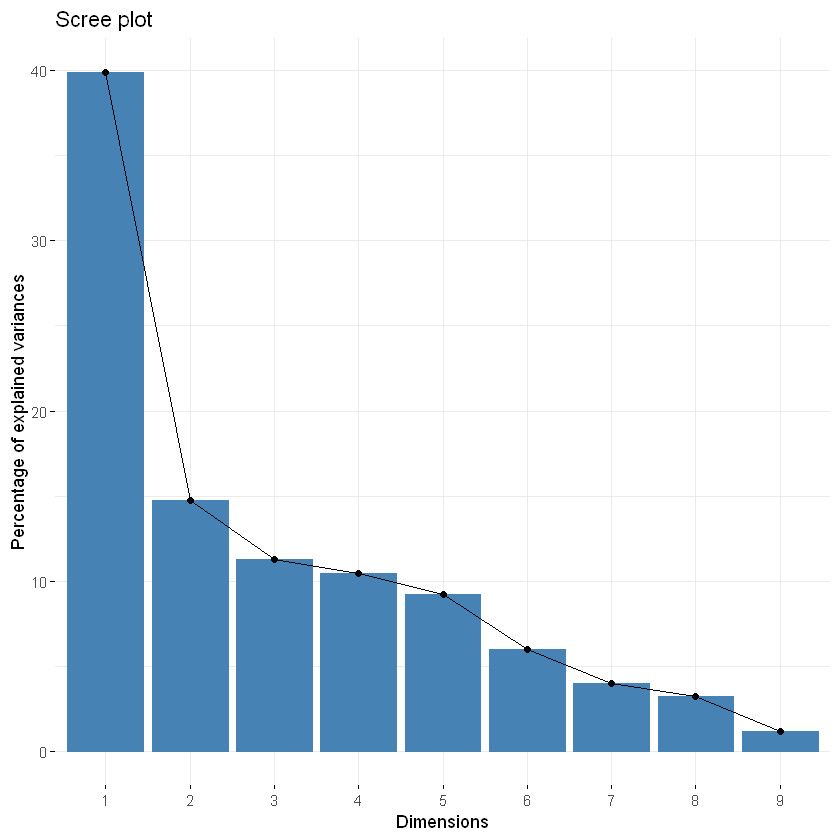

In [29]:
fviz_eig(etude_marche_pca)
dev.print(device = png, file = "eboulie", width = 600)

Les valeurs propre peuvent être considérées comme petites est proche à partir de la 6ème valeur, nous pourrions donc envisager de prendre les 5 premières dimensions.

Il est également utile de vérifier, pour chaque variable, la qualité de sa représentation sur un axe principal donné : 

corrplot 0.84 loaded


png 
  2

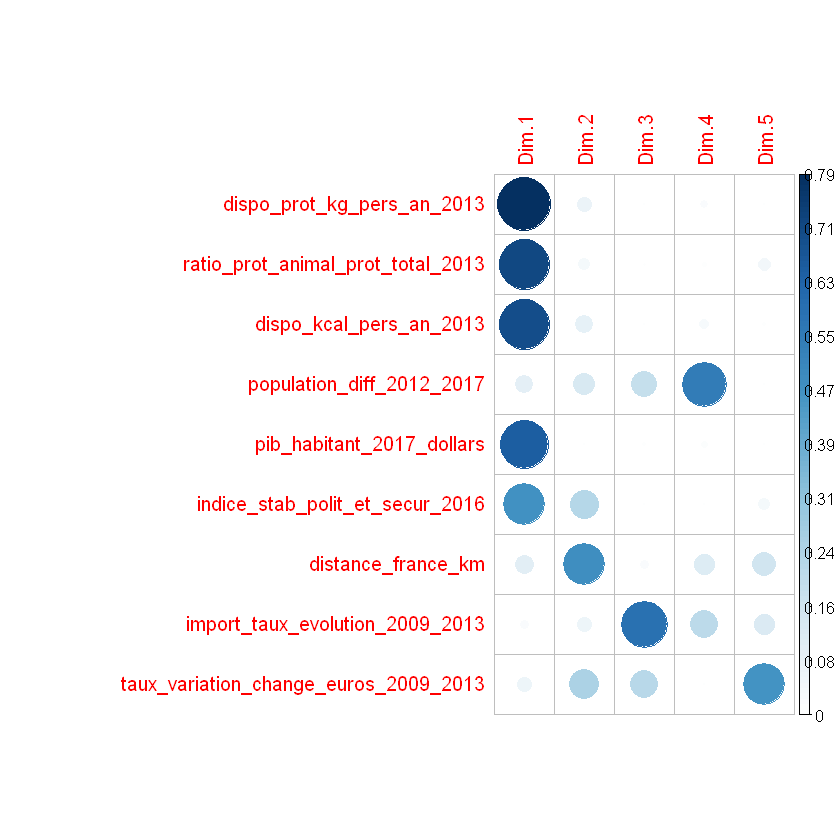

In [30]:

library("corrplot")

png(file = "var_heatmap.png", width = 800, height = 700)

corrplot(var$cos2, is.corr=FALSE)

dev.off()

corrplot(var$cos2, is.corr=FALSE)

In [31]:
# coordonnées
head(var$coord)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
dispo_prot_kg_pers_an_2013,0.8871380,0.251677154,0.03331092,0.13179827,-0.001537456
ratio_prot_animal_prot_total_2013,0.8444601,-0.191208822,0.04189381,0.08683637,-0.207021327
dispo_kcal_pers_an_2013,0.8334910,0.289749635,0.03109554,0.15701548,0.069296034
population_diff_2012_2017,-0.2994950,0.358309358,-0.42641819,0.74103417,-0.011929959
pib_habitant_2017_dollars,0.8067873,0.001647118,-0.06569404,0.11778062,0.018224451
indice_stab_polit_et_secur_2016,0.6921584,-0.475520979,0.01599376,-0.02288232,-0.198012704


In [32]:
# qualité de représentation, égal au carré des coordonnées (cos²), plus le chiffre est élevé, plus la représentation est bonne 
head(var$cos2)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
dispo_prot_kg_pers_an_2013,0.78701390,6.334139e-02,0.0011096174,0.0173707846,2.363772e-06
ratio_prot_animal_prot_total_2013,0.71311291,3.656081e-02,0.0017550913,0.0075405558,4.285783e-02
dispo_kcal_pers_an_2013,0.69470719,8.395485e-02,0.0009669328,0.0246538595,4.801940e-03
population_diff_2012_2017,0.08969725,1.283856e-01,0.1818324698,0.5491316477,1.423239e-04
pib_habitant_2017_dollars,0.65090575,2.712998e-06,0.0043157064,0.0138722753,3.321306e-04
indice_stab_polit_et_secur_2016,0.47908328,2.261202e-01,0.0002558005,0.0005236006,3.920903e-02


__Cercles de corrélation__ 

png 
  2

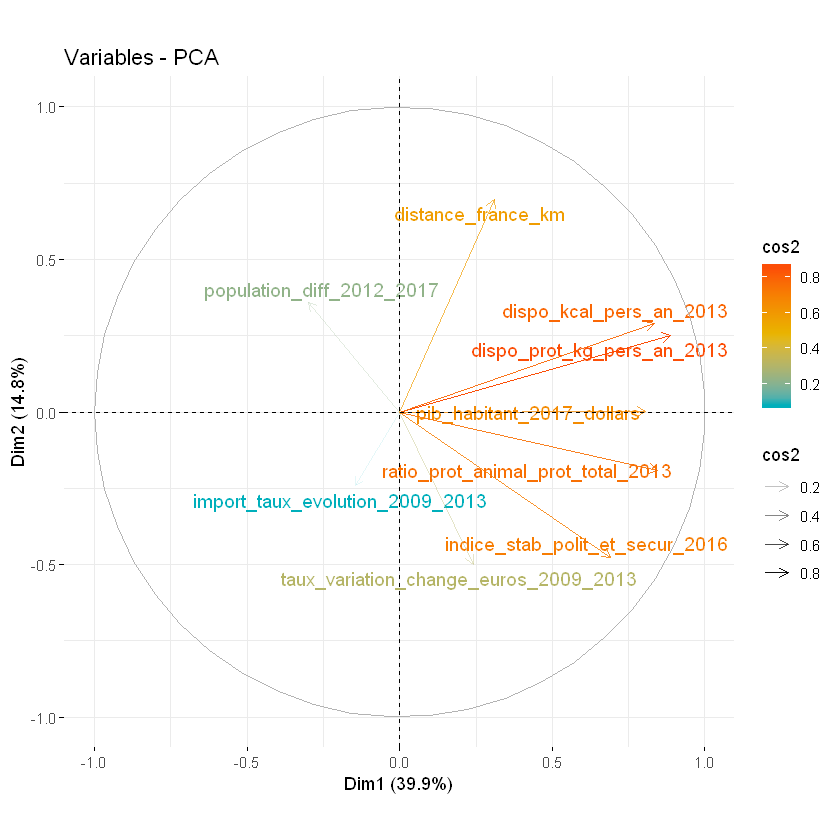

In [33]:
fviz_pca_var(etude_marche_pca , col.var = "cos2",alpha.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

dev.print(device = png, file = "cercle_correlations_dim12", width = 600)



Pour le premier plan factoriel, le graphique de corrélation des variables nous laisse voir qu'un ensemble de variables semblent être corrélées à droite du cercle. Elles se répartissent autour de l'axe Dim1 et semble toutes liées au niveau de richesse du pays.

La Dim2 est liée d'avantage à la distance avec la France des pays étudiés. 

Comme le confirme le cos2 la variable qui concerne l'évolution de la population et celle qui conernent la variation du taux de change semblent plutôt mal représentées par l'ACP. Celle qui concerne l'évolution du taux d'importation de viande de volaille est très mal représentée. 

La Dim1 récupère environ 39,9% du jeu de données et la Dim2 14,8% du jeu de données, au total cette projection en deux dimensions présente 54,3% des données.

Nous affichons également d'autres plans : 

png 
  2

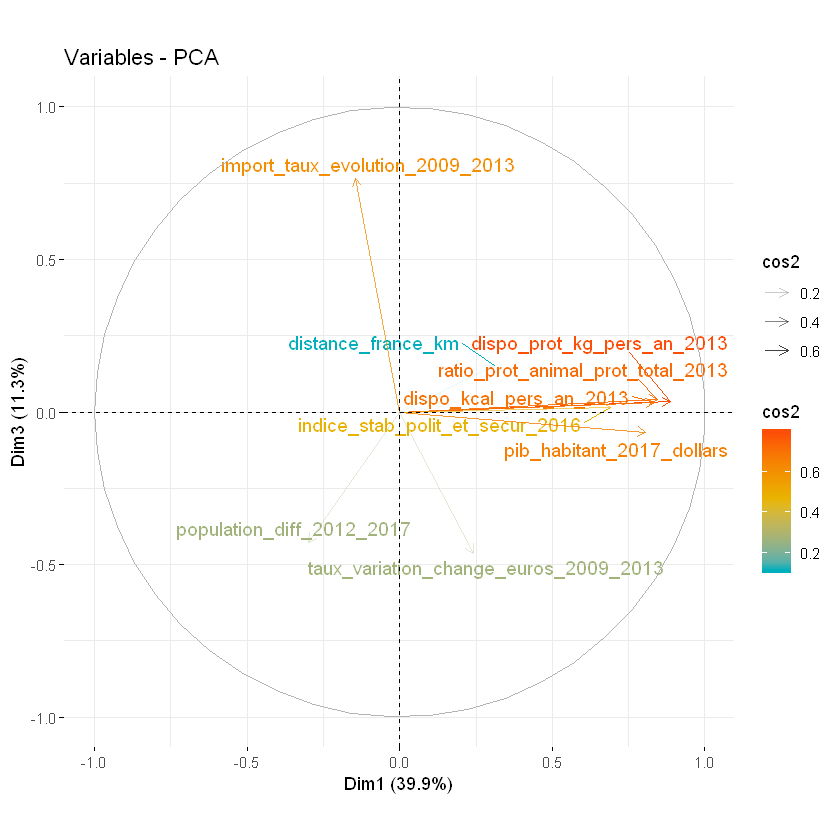

In [34]:
fviz_pca_var(etude_marche_pca , axes = c(1, 3), col.var = "cos2",alpha.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

dev.print(device = png, file = "cercle_correlations_dim13", width = 600)

png 
  2

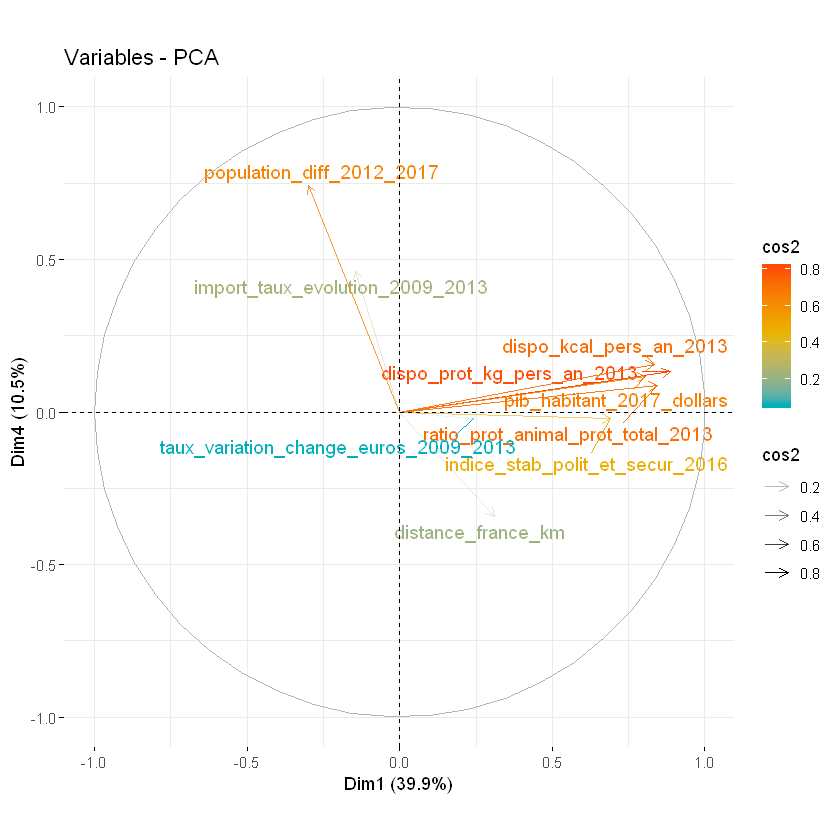

In [35]:
fviz_pca_var(etude_marche_pca , axes = c(1, 4), col.var = "cos2",alpha.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

dev.print(device = png, file = "cercle_correlations_dim14", width = 600)

png 
  2

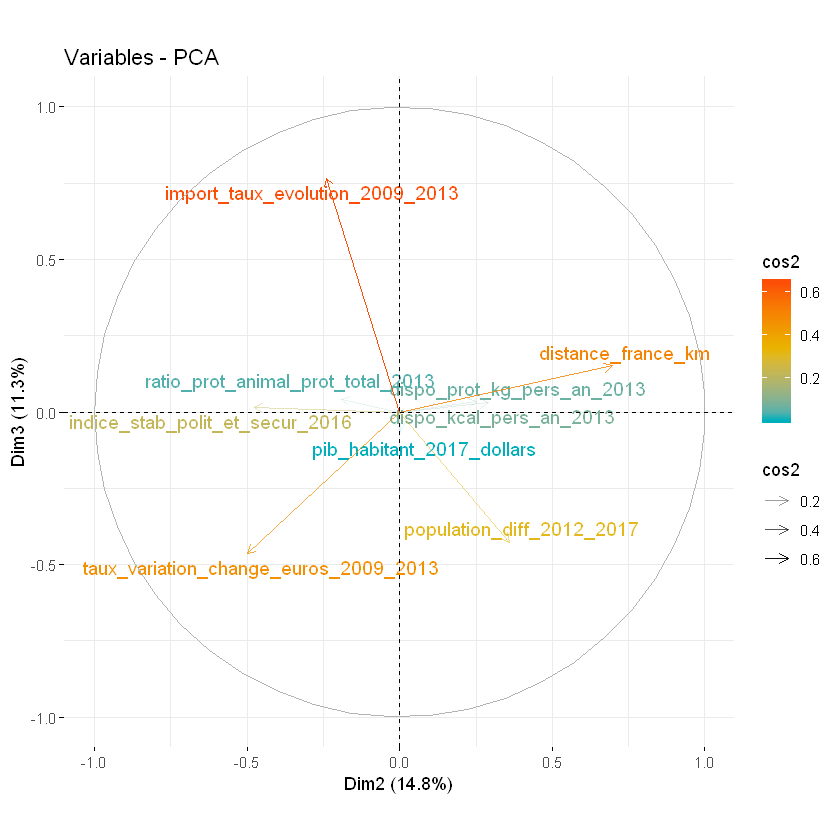

In [36]:
fviz_pca_var(etude_marche_pca , axes = c(2, 3), col.var = "cos2",alpha.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

dev.print(device = png, file = "cercle_correlations_23", width = 600)

png 
  2

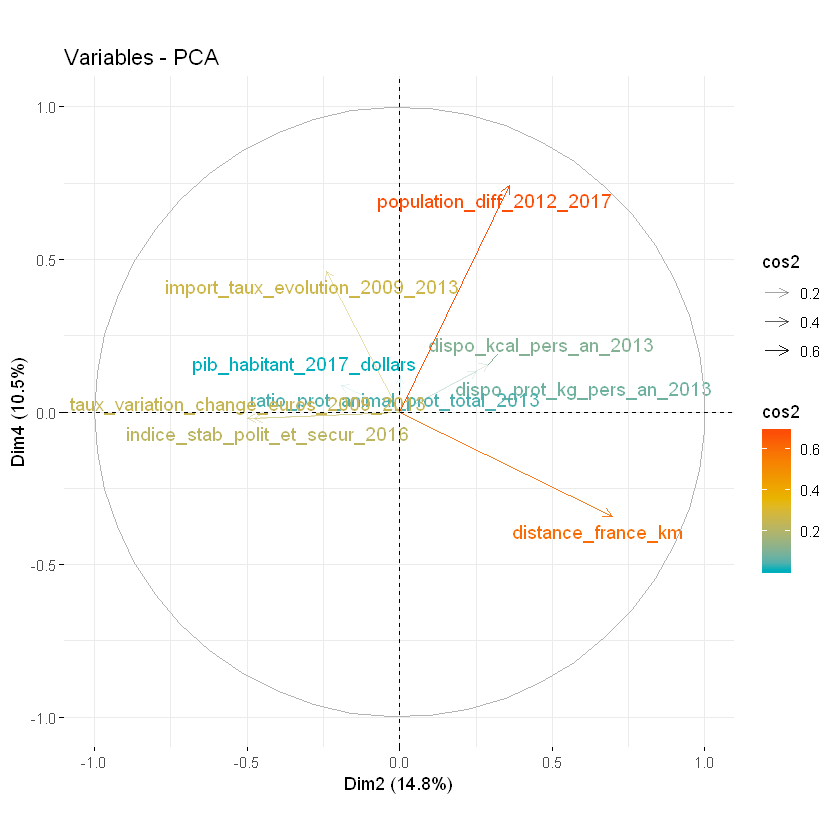

In [37]:
fviz_pca_var(etude_marche_pca , axes = c(2,4), col.var = "cos2",alpha.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

dev.print(device = png, file = "cercle_correlations", width = 600)

png 
  2

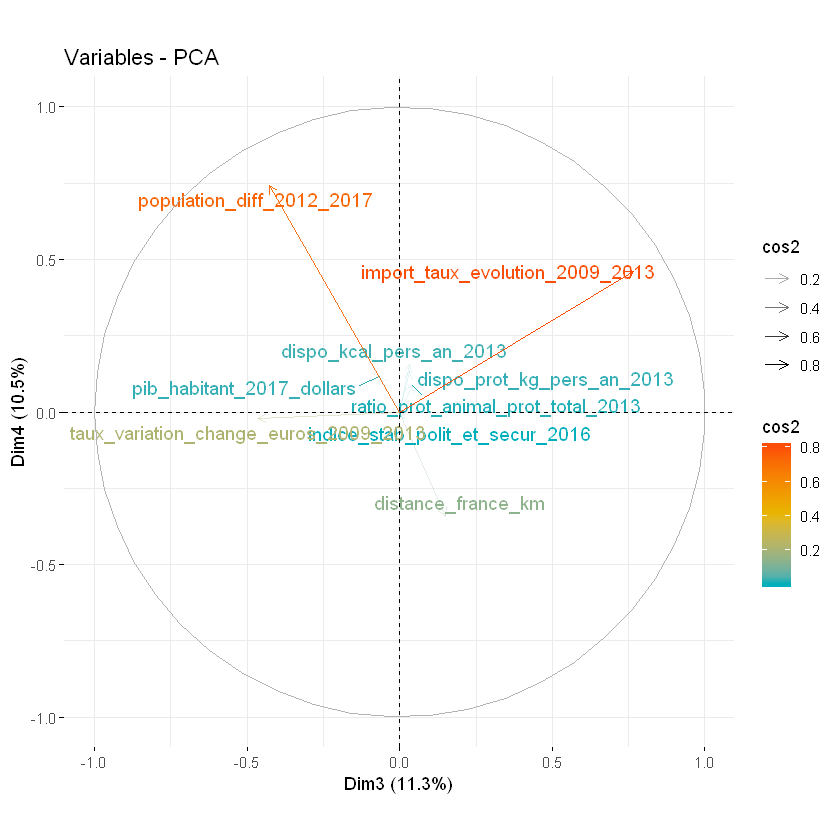

In [38]:
fviz_pca_var(etude_marche_pca , axes = c(3,4), col.var = "cos2",alpha.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Évite le chevauchement de texte
             )

dev.print(device = png, file = "cercle_correlations_dim34", width = 600)

__Contribution aux composantes principales :__

In [39]:
# Contributions aux composantes principales de chaque variable
print(var$contrib)

                                           Dim.1        Dim.2       Dim.3
dispo_prot_kg_pers_an_2013            21.9210428 4.763907e+00  0.10923220
ratio_prot_animal_prot_total_2013     19.8626462 2.749740e+00  0.17277351
dispo_kcal_pers_an_2013               19.3499836 6.314246e+00  0.09518614
population_diff_2012_2017              2.4983766 9.655884e+00 17.89982839
pib_habitant_2017_dollars             18.1299627 2.040447e-04  0.42484383
indice_stab_polit_et_secur_2016       13.3441165 1.700651e+01  0.02518134
distance_france_km                     2.6891054 3.643541e+01  2.24832711
import_taux_evolution_2009_2013        0.5962858 4.385932e+00 57.86899250
taux_variation_change_euros_2009_2013  1.6084803 1.868817e+01 21.15563499
                                            Dim.4        Dim.5
dispo_prot_kg_pers_an_2013             1.84338517 2.843558e-04
ratio_prot_animal_prot_total_2013      0.80020270 5.155689e+00
dispo_kcal_pers_an_2013                2.61626403 5.776613e-01
populati

Il est possible de modéliser ces contributions, nous nous interessons au deux premières dimensions. La ligne en pointillés montre la contribution moyenne. 

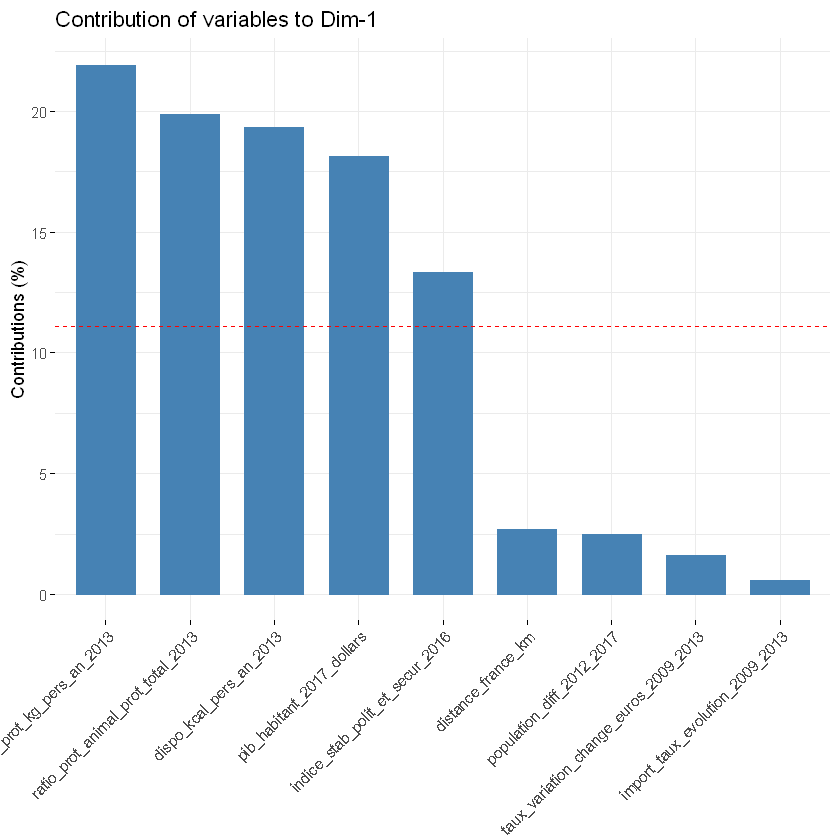

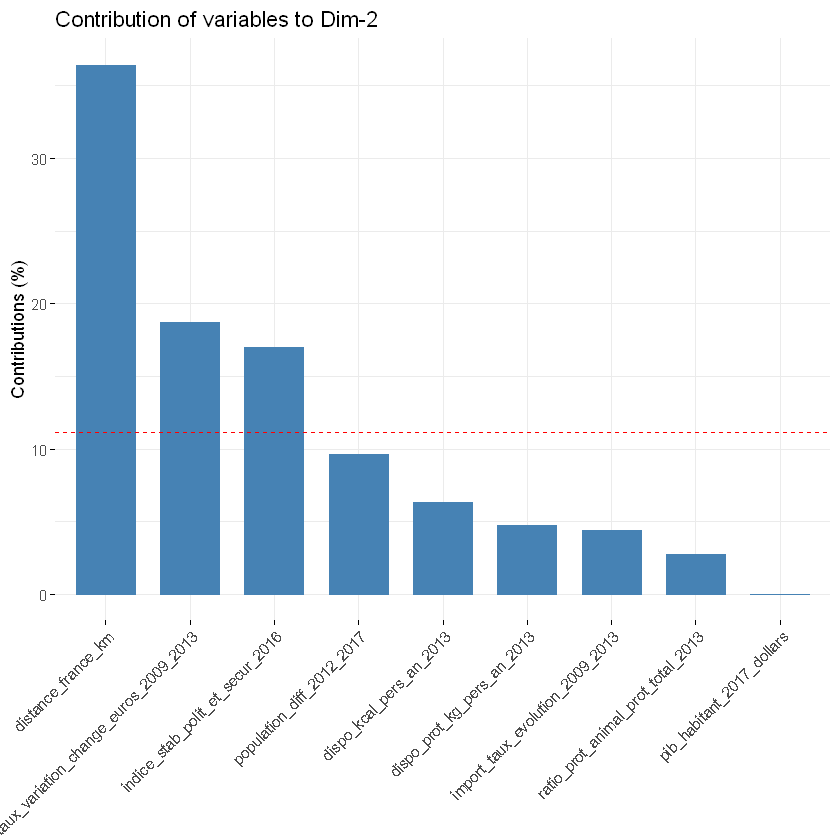

In [40]:
# Contributions des variables à PC1
fviz_contrib(etude_marche_pca, choice = "var", axes = 1, top = 9)
# Contributions des variables à PC2
fviz_contrib(etude_marche_pca, choice = "var", axes = 2, top = 9)

On distingue bien une composante principale construite autour du niveau de richesse du pays et la deuxième plutôt orientée vers la situation géographique du pays.

Il est possible également d'avoir la contribution des individus : 

In [41]:
head(ind$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Afghanistan,1.841194151,0.354123338,0.0039297909,0.009865895,0.7511457703
Afrique du Sud,0.001323519,0.024647114,0.0001019611,0.194150377,0.1279906434
Albanie,0.423567708,0.481154734,0.0038991900,0.226264590,0.0053530388
Algérie,0.012115363,1.143633009,0.7011815584,0.116115246,1.7731119767
Allemagne,1.483983233,0.306504723,0.0002574914,0.013795121,0.0561665529
Angola,0.479647222,0.003815438,0.0715334306,0.009782162,0.0007233194


On applique la __classification hiérarchique__ sur le résultat de l’ACP :

In [42]:
etude_marche_hcpc = HCPC(etude_marche_pca, graph = FALSE,nb.clust=5)
# nb.clust=5 permet d'indiquer le nombre de clusters souhaité

On visualise le dendrogramme : 

png 
  2

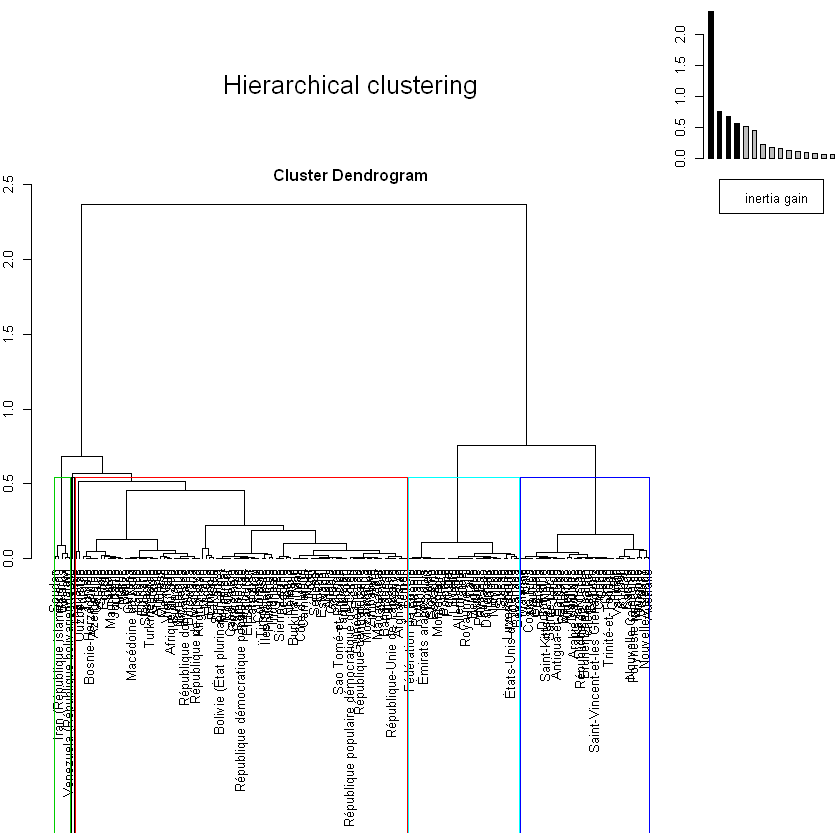

In [43]:
plot.HCPC(etude_marche_hcpc, rect=TRUE, choice="tree", draw.tree=TRUE, tree.barplot=TRUE )

dev.print(device = png, file = "dendrogramme", width = 600)

On procède à la visualisation des partitions dans un nuage de points : 

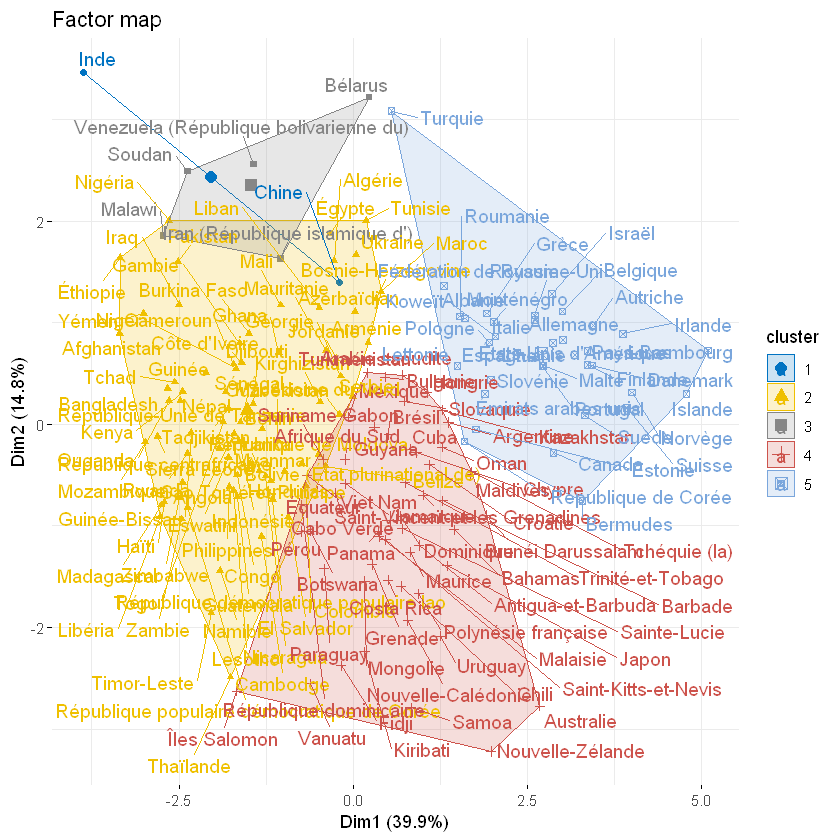

In [44]:
fviz_cluster(etude_marche_hcpc,
             repel = TRUE,            # Evite le chevauchement des textes
             show.clust.cent = TRUE, # Montre le centre des clusters
             palette = "jco",         # Palette de couleurs, voir ?ggpubr::ggpar
             ggtheme = theme_minimal(),
             main = "Factor map"
             )

In [45]:
# Récupération d'un tableau avec les variables étudiées et les clusters indiqués par individu
etude_marche_clust = etude_marche_hcpc$data.clust
etude_marche_centroides = etude_marche_clust %>% group_by(clust) 

# Création d'un tableau avec les centroïdes pour chaque variable
etude_marche_centroides = etude_marche_centroides %>% summarise(
  dispo_prot_kg_pers_an_2013 = mean(dispo_prot_kg_pers_an_2013),
  ratio_prot_animal_prot_total_2013 = mean(ratio_prot_animal_prot_total_2013),
    dispo_kcal_pers_an_2013 = mean(dispo_kcal_pers_an_2013),
    population_diff_2012_2017 = mean(population_diff_2012_2017),
    pib_habitant_2017_dollars = mean(pib_habitant_2017_dollars),
    indice_stab_polit_et_secur_2016 = mean(indice_stab_polit_et_secur_2016),
    distance_france_km = mean(distance_france_km),
    import_taux_evolution_2009_2013 = mean(import_taux_evolution_2009_2013),
    taux_variation_change_euros_2009_2013 = mean(taux_variation_change_euros_2009_2013)
)

# Transformation en variables centrées réduites de centroïdes
etude_marche_centroides_centres_reduit = etude_marche_centroides %>%
   mutate_at(c(-1), funs(c(scale(.))))

etude_marche_centroides_centres_reduit 

Warning message:
"funs() is soft deprecated as of dplyr 0.8.0
please use list() instead

# Before:
funs(name = f(.)

# After: 
list(name = ~f(.))
This warning is displayed once per session."

clust,dispo_prot_kg_pers_an_2013,ratio_prot_animal_prot_total_2013,dispo_kcal_pers_an_2013,population_diff_2012_2017,pib_habitant_2017_dollars,indice_stab_polit_et_secur_2016,distance_france_km,import_taux_evolution_2009_2013,taux_variation_change_euros_2009_2013
1,-0.252822190,-0.8542349,-0.27293096,1.7873093,-0.37800528,-0.4647003,-0.73461363,-0.85258648,0.3150741
2,-1.056847073,-0.9789157,-0.95921638,-0.4050069,-0.73691079,-0.7680769,0.12325221,0.93322766,0.4046042
3,-0.329233181,-0.2560266,-0.42743679,-0.4055938,-0.59171004,-0.9274974,-0.04647941,1.00516417,-1.7813918
4,-0.007519184,0.8655266,-0.02038458,-0.4862832,-0.01492291,1.0648636,-0.94123983,0.09047746,0.5358163
5,1.646421628,1.2236506,1.67996871,-0.4904255,1.72154902,1.0954111,1.59908066,-1.17628281,0.5258973


In [46]:
etude_marche_centroides_centres_reduit = column_to_rownames(etude_marche_centroides_centres_reduit, 'clust')

write.csv(etude_marche_centroides_centres_reduit , file = "etude_marche_centroides_centres_reduit .csv")

In [51]:
pays_clusters = etude_marche_clust %>% select("clust")
pays_clusters

,clust
Afghanistan,2
Afrique du Sud,4
Albanie,5
Algérie,2
Allemagne,5
Angola,2
Antigua-et-Barbuda,4
Arabie saoudite,4
Argentine,4
Arménie,2


In [53]:
pays_clusters = etude_marche_clust %>% select("clust")

write.csv(pays_clusters, file = "pays_clusters.csv")

Nombre de pays par cluster : 

In [55]:
head(etude_marche_clust)

nrow(etude_marche_clust %>% filter(clust == "1"))
nrow(etude_marche_clust %>% filter(clust == "2"))
nrow(etude_marche_clust %>% filter(clust == "3"))
nrow(etude_marche_clust %>% filter(clust == "4"))
nrow(etude_marche_clust %>% filter(clust == "5"))

,dispo_prot_kg_pers_an_2013,ratio_prot_animal_prot_total_2013,dispo_kcal_pers_an_2013,population_diff_2012_2017,pib_habitant_2017_dollars,indice_stab_polit_et_secur_2016,distance_france_km,import_taux_evolution_2009_2013,taux_variation_change_euros_2009_2013,clust
Afghanistan,21264900,20.96,761755,4833123,618.990,-2.75,-5594.2234,108.70,-5.16,2
Afrique du Sud,31145450,42.65,1102300,3718943,6151.087,-0.13,-9306.6385,68.72,-8.89,4
Albanie,40650050,53.34,1163620,10148,4450.008,0.26,-1603.9445,-3.85,-6.32,5
Algérie,33550800,27.18,1201945,3752295,4055.247,-1.14,-1345.4604,200.00,-4.41,2
Allemagne,37007350,60.65,1278595,1047996,44976.426,0.76,-880.6348,16.57,0.00,5
Angola,20903550,32.13,903010,4688043,4247.411,-0.39,-6478.9539,112.42,-16.27,2


[1] 2

[1] 74

[1] 5

[1] 54

[1] 35

In [56]:
head(etude_marche_clust %>% filter(clust == "1"))
head(etude_marche_clust %>% filter(clust == "2"))
head(etude_marche_clust %>% filter(clust == "3"))
head(etude_marche_clust %>% filter(clust == "4"))
head(etude_marche_clust %>% filter(clust == "5"))

dispo_prot_kg_pers_an_2013,ratio_prot_animal_prot_total_2013,dispo_kcal_pers_an_2013,population_diff_2012_2017,pib_habitant_2017_dollars,indice_stab_polit_et_secur_2016,distance_france_km,import_taux_evolution_2009_2013,taux_variation_change_euros_2009_2013,clust
35788250,40.42,1135880,34999857,13695.626,-0.07078313,-9283.668,1.12000,-4.508935,1
21867150,20.00,895710,76114275,1923.316,-0.95000000,-7018.087,57.11764,-15.690000,1


dispo_prot_kg_pers_an_2013,ratio_prot_animal_prot_total_2013,dispo_kcal_pers_an_2013,population_diff_2012_2017,pib_habitant_2017_dollars,indice_stab_polit_et_secur_2016,distance_france_km,import_taux_evolution_2009_2013,taux_variation_change_euros_2009_2013,clust
21264900,20.96,761755,4833123,618.990,-2.75,-5594.223,108.70000,-5.16,2
33550800,27.18,1201945,3752295,4055.247,-1.14,-1345.460,200.00000,-4.41,2
20903550,32.13,903010,4688043,4247.411,-0.39,-6478.954,112.42000,-16.27,2
32871900,48.01,1067260,48528,3936.799,-0.60,-3439.397,14.29000,-7.76,2
33985150,32.31,1136245,562672,4146.374,-0.87,-3822.723,-61.54000,6.73,2
20388900,17.78,895345,8942698,1491.673,-1.24,-7924.215,57.11764,-8.11,2


dispo_prot_kg_pers_an_2013,ratio_prot_animal_prot_total_2013,dispo_kcal_pers_an_2013,population_diff_2012_2017,pib_habitant_2017_dollars,indice_stab_polit_et_secur_2016,distance_france_km,import_taux_evolution_2009_2013,taux_variation_change_euros_2009_2013,clust
34229700,58.59,1185885,-3392,5749.8147,0.12,-6105.437,23.08000,-203.84,3
31846250,25.44,1127485,4709214,5679.6485,-0.74,-6105.437,240.00000,-78.40,3
23553450,12.07,862860,2524799,340.4171,-0.06,-7617.569,57.11764,-146.69,3
25801850,41.31,852275,4543138,2967.0834,-2.38,-4601.585,57.11764,-97.52,3
26630400,52.26,961045,2083985,7977.3592,-1.03,-7619.687,12.50000,-169.20,3


dispo_prot_kg_pers_an_2013,ratio_prot_animal_prot_total_2013,dispo_kcal_pers_an_2013,population_diff_2012_2017,pib_habitant_2017_dollars,indice_stab_polit_et_secur_2016,distance_france_km,import_taux_evolution_2009_2013,taux_variation_change_euros_2009_2013,clust
31145450,42.65,1102300,3718943,6151.087,-0.13,-9306.639,68.72,-8.89,4
30473850,68.07,881840,5235,14803.011,1.01,-6711.071,-14.29,4.43,4
33430350,43.59,1188075,3851856,20760.906,-0.50,-6105.437,50.26,4.43,4
37449000,65.23,1177490,2174302,14399.621,0.22,-11025.348,-33.33,-40.62,4
38784900,67.47,1196470,1628712,57613.226,0.96,-16957.684,240.00,22.80,4
31448400,65.51,974550,23322,29824.669,0.90,-7219.129,-5.00,4.43,4


dispo_prot_kg_pers_an_2013,ratio_prot_animal_prot_total_2013,dispo_kcal_pers_an_2013,population_diff_2012_2017,pib_habitant_2017_dollars,indice_stab_polit_et_secur_2016,distance_france_km,import_taux_evolution_2009_2013,taux_variation_change_euros_2009_2013,clust
40650050,53.34,1163620,10148,4450.008,0.26,-1603.9445,-3.85,-6.32,5
37007350,60.65,1278595,1047996,44976.426,0.76,-880.6348,16.57,0.00,5
38763000,59.19,1376050,217905,47717.729,0.82,-1036.7114,12.90,0.00,5
36270050,58.51,1364005,345786,43288.915,0.48,-264.6008,45.66,0.00,5
32981400,66.71,973820,-1830,102192.115,1.00,-5757.8504,-33.33,4.43,5
38346900,52.07,1277135,1723494,44973.548,1.24,-6016.7294,11.33,13.91,5


png 
  2

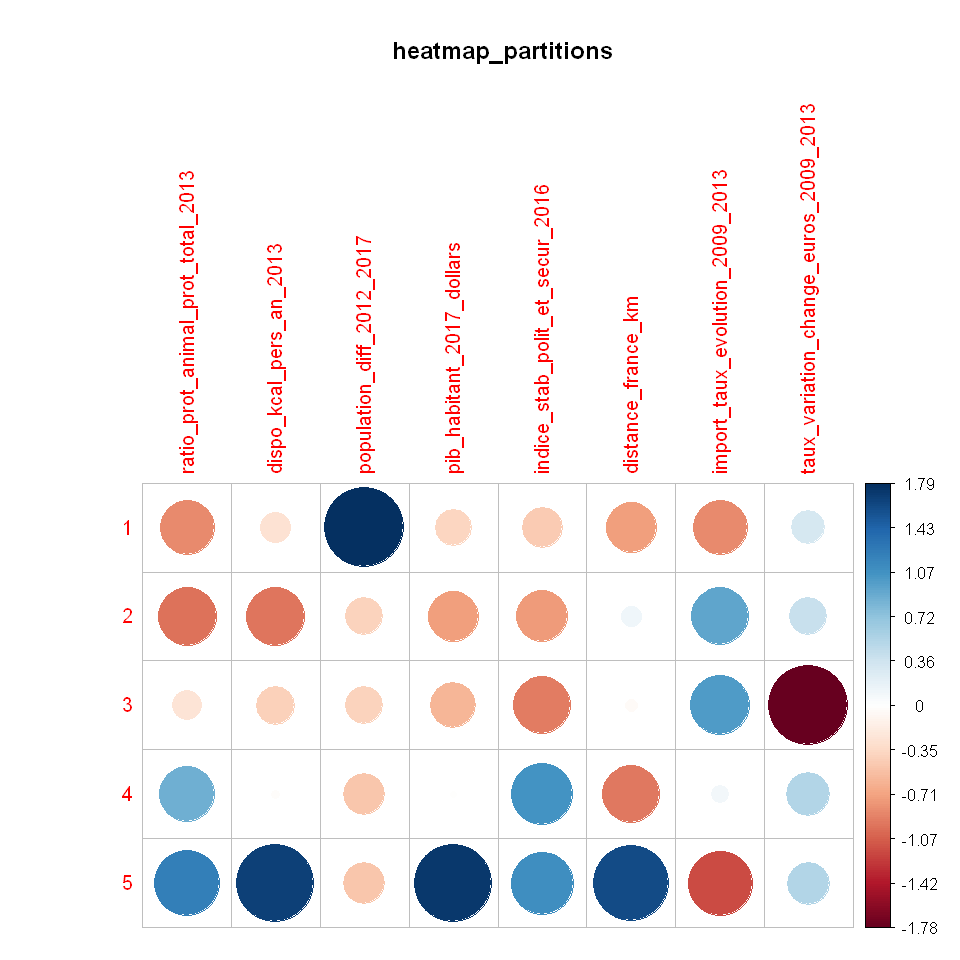

In [57]:
# Création d'une version alternative du tableau sans les clusts pour créer une heatmap
etude_marche_centroides_centres_reduit2 = etude_marche_centroides_centres_reduit[-1]

# Création d'une matrice pour faire le corrplot des corrélations 
etude_marche_centroides_centres_reduit_matrice <- as.matrix(etude_marche_centroides_centres_reduit2[,])

# On créé le corrplot
png(filename="C:/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/corplot_clust1")
corrplot(etude_marche_centroides_centres_reduit_matrice, is.corr=FALSE, method = "circle")
title(main="heatmap_partitions")
dev.off()

options(repr.plot.width=8, repr.plot.height=8)
corrplot(etude_marche_centroides_centres_reduit_matrice, is.corr=FALSE, method = "circle")
title(main="heatmap_partitions")

In [58]:
etude_marche_hcpc$desc.var$quanti
#donne des informations sur les variables qui décrivent les clusters

,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
population_diff_2012_2017,10.6929,55557066,2361335,20557209,7056430,1.098814e-26
,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
pib_habitant_2017_dollars,-6.686448,2.323384e+03,1.369563e+04,1.811094e+03,1.941218e+04,2.286521e-11
dispo_kcal_pers_an_2013,-7.148081,9.363532e+05,1.036516e+06,1.331307e+05,1.599343e+05,8.799969e-13
dispo_prot_kg_pers_an_2013,-7.972789,2.445702e+07,2.946211e+07,5.188019e+06,7.165149e+06,1.551324e-15
indice_stab_polit_et_secur_2016,-8.273638,-7.120376e-01,-7.078313e-02,6.787906e-01,8.846215e-01,1.299327e-16
ratio_prot_animal_prot_total_2013,-9.809913,2.860014e+01,4.231359e+01,1.016465e+01,1.595531e+01,1.020567e-22
,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
taux_variation_change_euros_2009_2013,-11.09724,-139.13,-4.508935,45.97449,27.45266,1.293785e-28
,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value


Le cluster 1:
- les pays qui ont connus une forte croissance de leur population

Les pays du cluster 2, en moyenne et en comparaison avec l'ensemble de l'échantillon possèdent :
- une forte croissance de la population
- Il possède un PIB par habitant bas 
- une stabilité politique mauvaise
- une disponibilité alimentaire faible
Il s'agit de pays pauvres 

Le cluster 3 contient les pays : 
- ayant une forte disponibilite kcal par personne pour 2013
- un très indice de stabilité politique 
- une forte dévaluation monétaire par rapport à l'euro
Il s'agit toujours de pays relativement pauvres

Le cluster 4 contient les pays : 
- ont un indice de stabilité positif 
- une forte consommation en protéine animale 
- une monnaie qui est resté relativement stable par rapport à l'euro 
- ce sont des pays relativement éloignés de la France

Le cluster 5 contient les pays : 
- les pays riches
- et proches de la France
La plus part des pays riches étant en europe, c'est un résultat attendu



In [59]:
etude_marche_hcpc$desc.ind$para
#donne les 5 individus les plus typiques de chaque groupes

Cluster: 1
   Chine     Inde 
3.011092 3.011092 
------------------------------------------------------------ 
Cluster: 2
    Népal     Bénin   Sénégal     Niger    Angola 
0.4636878 0.5071018 0.5247047 0.5917447 0.6719639 
------------------------------------------------------------ 
Cluster: 3
Venezuela (République bolivarienne du)                                 Malawi 
                              1.377550                               1.453435 
                                Soudan         Iran (République islamique d') 
                              2.035447                               2.766887 
                               Bélarus 
                              3.198312 
------------------------------------------------------------ 
Cluster: 4
              Panama         Sainte-Lucie Saint-Kitts-et-Nevis 
           0.2522426            0.4633371            0.5373076 
            Malaisie              Maurice 
           0.5680627            0.5792116 
--------------------

In [60]:
etude_marche_hcpc$desc.axes$quanti
#donne des informations au sujet des axes qui définissent les groupes 

,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
Dim.4,8.341503,5.708767,2.777624e-16,1.9034743,0.9707372,7.335188e-17
Dim.2,2.986829,2.428112,6.938282e-16,1.0354542,1.1530872,2.818874e-03
Dim.3,-4.777663,-3.394870,2.474277e-17,0.9732901,1.0078857,1.773443e-06
,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
Dim.5,4.629055,0.3697775,6.328169e-17,0.6197873,0.9117416,3.673385e-06
Dim.4,-2.501346,-0.2127413,2.777624e-16,0.8224379,0.9707372,1.237223e-02
Dim.1,-9.139320,-1.5172281,1.537414e-15,0.9618927,1.8947879,6.284623e-20
,v.test,Mean in category,Overall mean,sd in category,Overall sd,p.value
Dim.3,5.284285,2.353484,2.474277e-17,0.6198022,1.0078857,1.261963e-07
Dim.2,4.612042,2.350006,6.938282e-16,0.5629045,1.1530872,3.987326e-06


On peut voir pour chaque clusters les dimensions surlesquels ils sont le mieux modélisés.

In [61]:
head(etude_marche_pca)

$eig
       eigenvalue percentage of variance cumulative percentage of variance
comp 1  3.5902211              39.891345                          39.89135
comp 2  1.3296100              14.773444                          54.66479
comp 3  1.0158336              11.287040                          65.95183
comp 4  0.9423307              10.470341                          76.42217
comp 5  0.8312727               9.236363                          85.65853
comp 6  0.5396344               5.995937                          91.65447
comp 7  0.3572161               3.969067                          95.62354
comp 8  0.2900601               3.222890                          98.84643
comp 9  0.1038215               1.153572                         100.00000

$var
$var$coord
                                           Dim.1        Dim.2       Dim.3
dispo_prot_kg_pers_an_2013             0.8871380  0.251677154  0.03331092
ratio_prot_animal_prot_total_2013      0.8444601 -0.191208822  0.04189381
dispo_

Too few points to calculate an ellipse


png 
  2

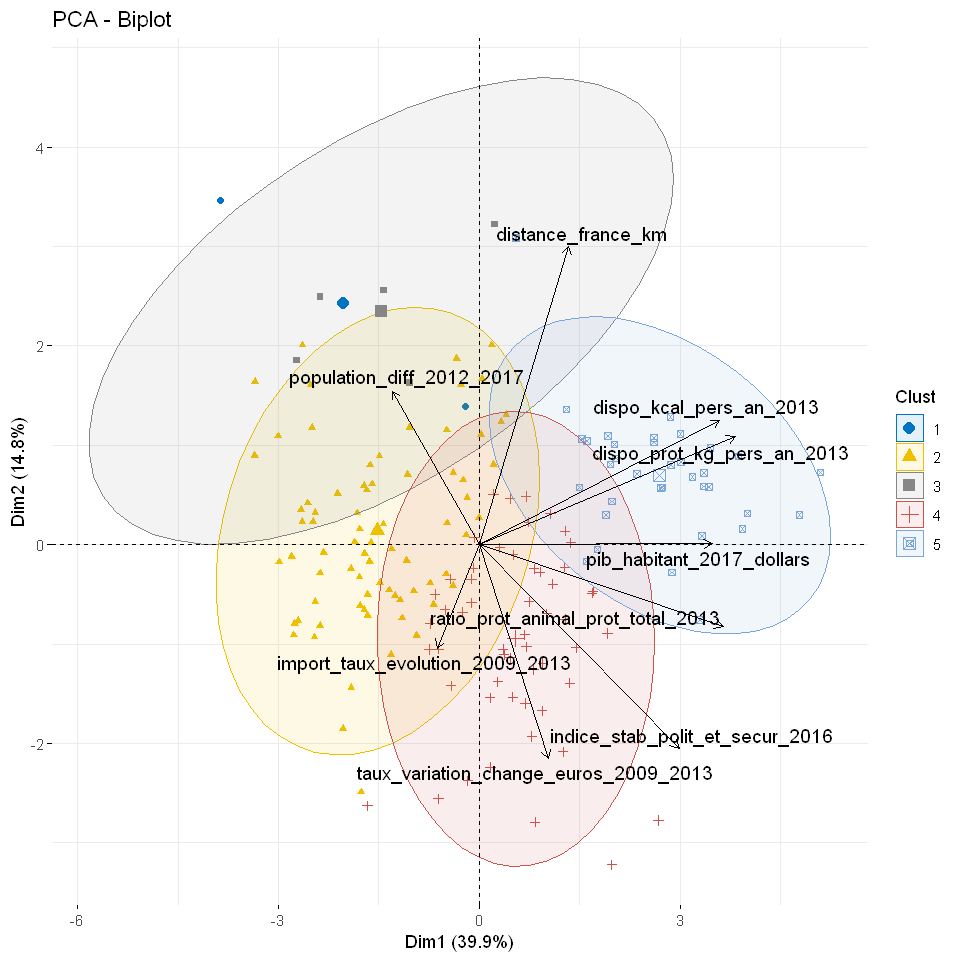

In [62]:
fviz_pca_biplot (etude_marche_pca,
                col.ind = etude_marche_clust$clust, palette = "jco",
                addEllipses = TRUE, label = c("var") ,
                col.var = "black", repel = TRUE,
                legend.title = "Clust")

png(filename="C:/Users/octav/Google Drive/OC_Data Analyst_GORAM Octave/Projets/Projet 5/clust_final")

dev.off()

Le cluster 5 est le plus intéressant car il regroupe un ensemble de pays qui se distinguent postivement du reste de l'échantillon pour des variables clefs, puisqu'elles concernent la richesse, la stabilité politique, la proximité avec la France des pays et une importante consommation de viande. 

## C. Filtrage final 

In [63]:
library("data.table")

setDT(etude_marche_clust, keep.rownames = "pays")
#en cas de filter les noms de colonnes sont perdus, il faut les transformer en colonnes 

etude_marche_clust_5 = filter(etude_marche_clust, clust == "5")
#nous gardons le cluster 5 qui correspond aux pays les plus intéressants 


# nous filtrons les pays garder les monnaies qui ne ce sont pas devaluees par rapport à l'euro
etude_marche_resultat = etude_marche_clust_5 %>% filter(taux_variation_change_euros_2009_2013 >= 0)

# nous conservons les pays ayant connus une croissance de leur population
etude_marche_resultat = etude_marche_resultat %>% filter(population_diff_2012_2017 >= 0)

#nous trions les pays en fonciton de leurs consommation de viande
etude_marche_resultat = head(arrange(etude_marche_resultat, desc(distance_france_km)),10)

etude_marche_resultat = head(arrange(etude_marche_resultat, desc(ratio_prot_animal_prot_total_2013)),5)
                                                      
etude_marche_resultat = head(arrange(etude_marche_resultat, desc(pib_habitant_2017_dollars)),3)

etude_marche_resultat


Attaching package: 'data.table'

The following objects are masked from 'package:reshape2':

    dcast, melt

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose



pays,dispo_prot_kg_pers_an_2013,ratio_prot_animal_prot_total_2013,dispo_kcal_pers_an_2013,population_diff_2012_2017,pib_habitant_2017_dollars,indice_stab_polit_et_secur_2016,distance_france_km,import_taux_evolution_2009_2013,taux_variation_change_euros_2009_2013,clust
Luxembourg,41478600,63.46,1292100,51068,106805.77,1.41,-287.9722,11.11,0.00,5
Suisse,33904850,64.33,1238445,444335,80101.20,1.32,-490.3052,-3.45,18.59,5
Norvège,40416450,59.58,1271295,293376,75295.26,1.17,-1344.0194,100.00,10.72,5


In [64]:
# nous filtrons les pays garder les monnaies qui ne ce sont pas devaluees par rapport à l'euro
etude_marche_resultat = etude_marche_clust_5 %>% filter(taux_variation_change_euros_2009_2013 >= 0)

# nous conservons les pays ayant connus une croissance de leur population
etude_marche_resultat = etude_marche_resultat %>% filter(population_diff_2012_2017 >= 0)

#nous trions les pays en fonciton de leurs consommation de viande
etude_marche_resultat = head(arrange(etude_marche_resultat, desc(distance_france_km)),10)

etude_marche_resultat = head(arrange(etude_marche_resultat, desc(ratio_prot_animal_prot_total_2013)),5)
                                                      
etude_marche_resultat = head(arrange(etude_marche_resultat, desc(pib_habitant_2017_dollars)),3)

etude_marche_resultat

pays,dispo_prot_kg_pers_an_2013,ratio_prot_animal_prot_total_2013,dispo_kcal_pers_an_2013,population_diff_2012_2017,pib_habitant_2017_dollars,indice_stab_polit_et_secur_2016,distance_france_km,import_taux_evolution_2009_2013,taux_variation_change_euros_2009_2013,clust
Luxembourg,41478600,63.46,1292100,51068,106805.77,1.41,-287.9722,11.11,0.00,5
Suisse,33904850,64.33,1238445,444335,80101.20,1.32,-490.3052,-3.45,18.59,5
Norvège,40416450,59.58,1271295,293376,75295.26,1.17,-1344.0194,100.00,10.72,5


# III. Statistiques inférentielles

Nous cherchons une variable suivant une loi normale. 

# A. Loi normale

Nous vérifions les variables qui suivent une distribution normale pour pouvoir procéder à des tests statistiques.

[1] 2361335

[1] 7077276

[1] 5.008783e+13

[1] 4.97932e+13

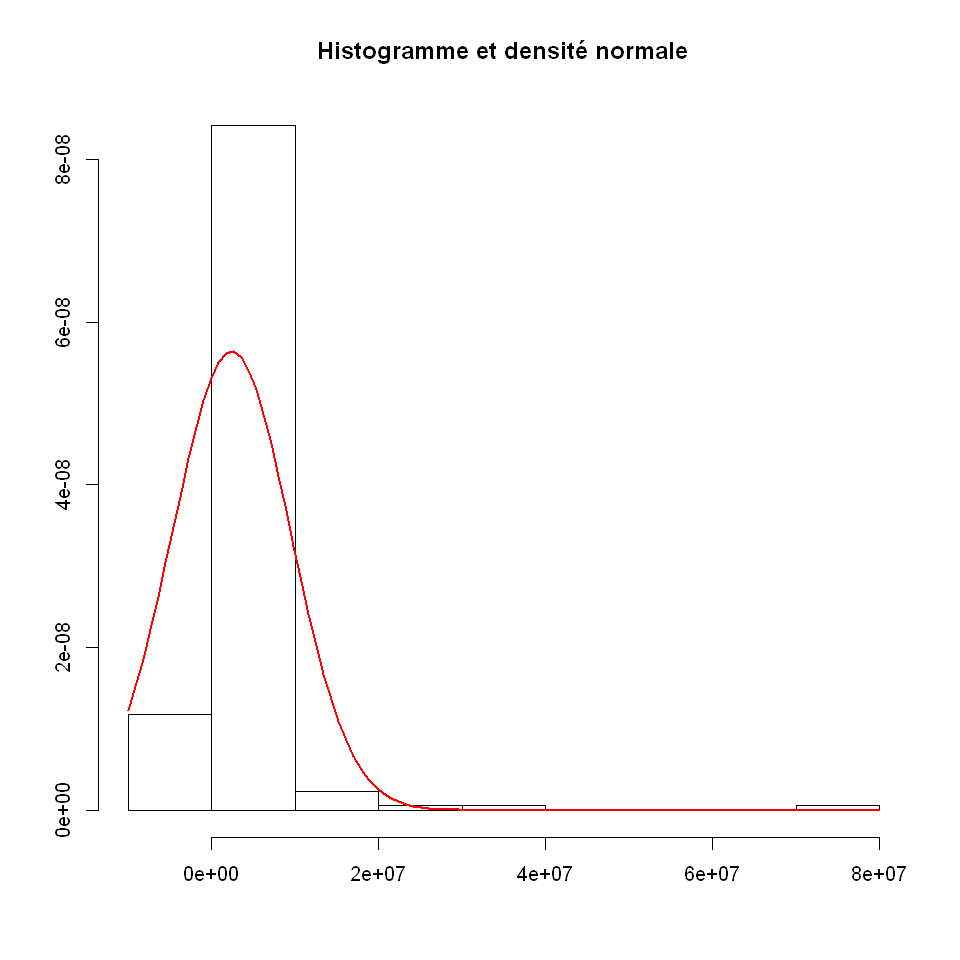

In [65]:
xbar <- mean(etude_marche$population_diff_2012_2017)
round(xbar,digits=2)


sprime <- sd(etude_marche$population_diff_2012_2017)
round(sprime,digits=2)


sprime2 <- var(etude_marche$population_diff_2012_2017)
round(sprime2,digits=2)


n_etude_marche <- dim(etude_marche)[1]
v <- sprime2*(n_etude_marche-1)/n_etude_marche
round(v,digits=2)


hist(etude_marche$population_diff_2012_2017,prob=TRUE,xlab="",ylab="",main="Histogramme et densité normale")
curve(dnorm(x,mean=xbar,sd=sprime),col="red",lwd=2,add=TRUE,yaxt="n")

[1] 42.31

[1] 16

[1] 256.08

[1] 254.57

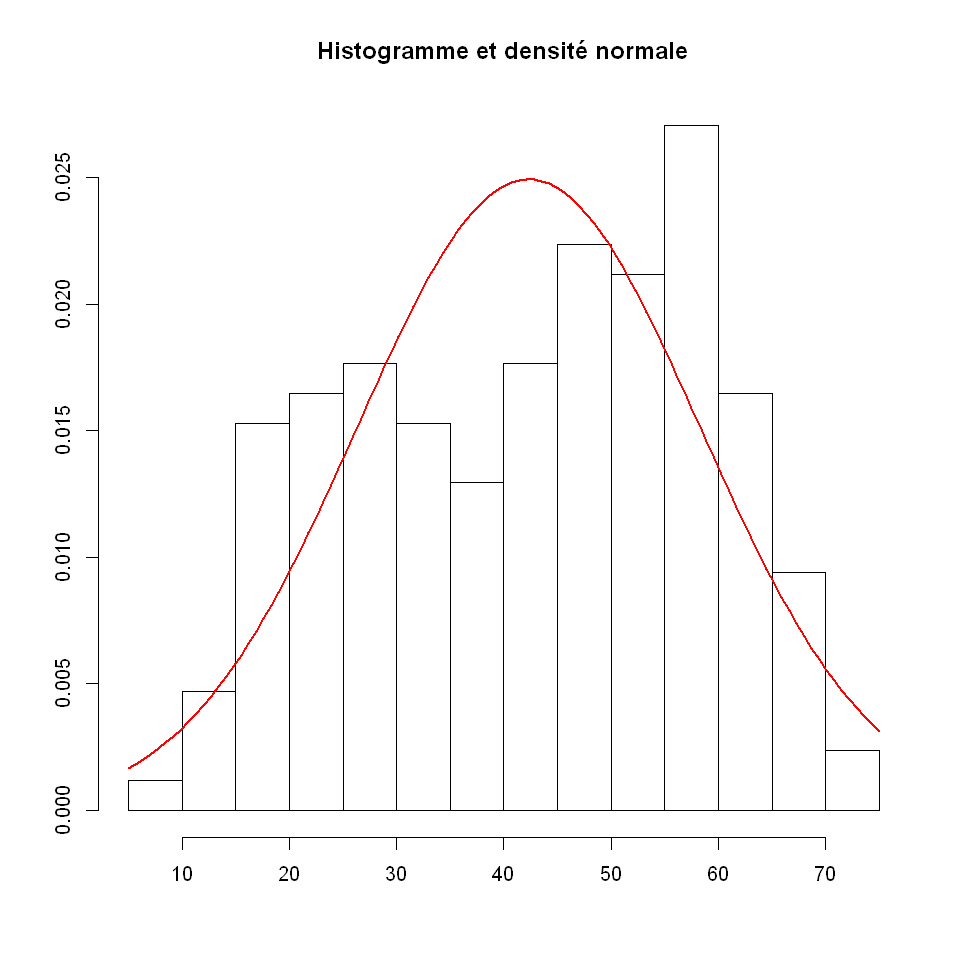

In [66]:
xbar <- mean(etude_marche$ratio_prot_animal_prot_total_2013)
round(xbar,digits=2)


sprime <- sd(etude_marche$ratio_prot_animal_prot_total_2013)
round(sprime,digits=2)


sprime2 <- var(etude_marche$ratio_prot_animal_prot_total_2013)
round(sprime2,digits=2)


n_etude_marche <- dim(etude_marche)[1]
v <- sprime2*(n_etude_marche-1)/n_etude_marche
round(v,digits=2)


hist(etude_marche$ratio_prot_animal_prot_total_2013,prob=TRUE,xlab="",ylab="",main="Histogramme et densité normale")
curve(dnorm(x,mean=xbar,sd=sprime),col="red",lwd=2,add=TRUE,yaxt="n")

[1] 29462113

[1] 7186317

[1] 5.164315e+13

[1] 5.133937e+13

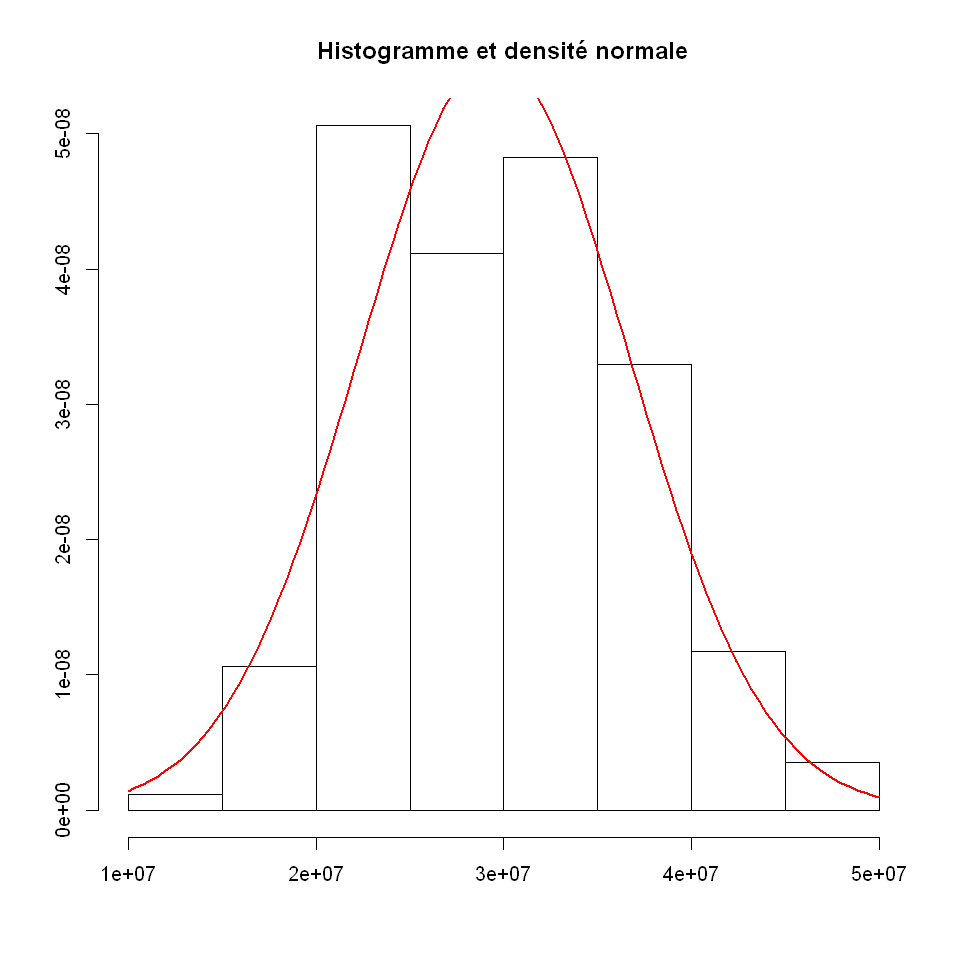

In [67]:
xbar <- mean(etude_marche$dispo_prot_kg_pers_an_2013	)
round(xbar,digits=2)


sprime <- sd(etude_marche$dispo_prot_kg_pers_an_2013	)
round(sprime,digits=2)


sprime2 <- var(etude_marche$dispo_prot_kg_pers_an_2013	)
round(sprime2,digits=2)


n_etude_marche <- dim(etude_marche)[1]
v <- sprime2*(n_etude_marche-1)/n_etude_marche
round(v,digits=2)


hist(etude_marche$dispo_prot_kg_pers_an_2013	,prob=TRUE,xlab="",ylab="",main="Histogramme et densité normale")
curve(dnorm(x,mean=xbar,sd=sprime),col="red",lwd=2,add=TRUE,yaxt="n")

[1] 1036516

[1] 160406.8

[1] 25730330797

[1] 25578975910

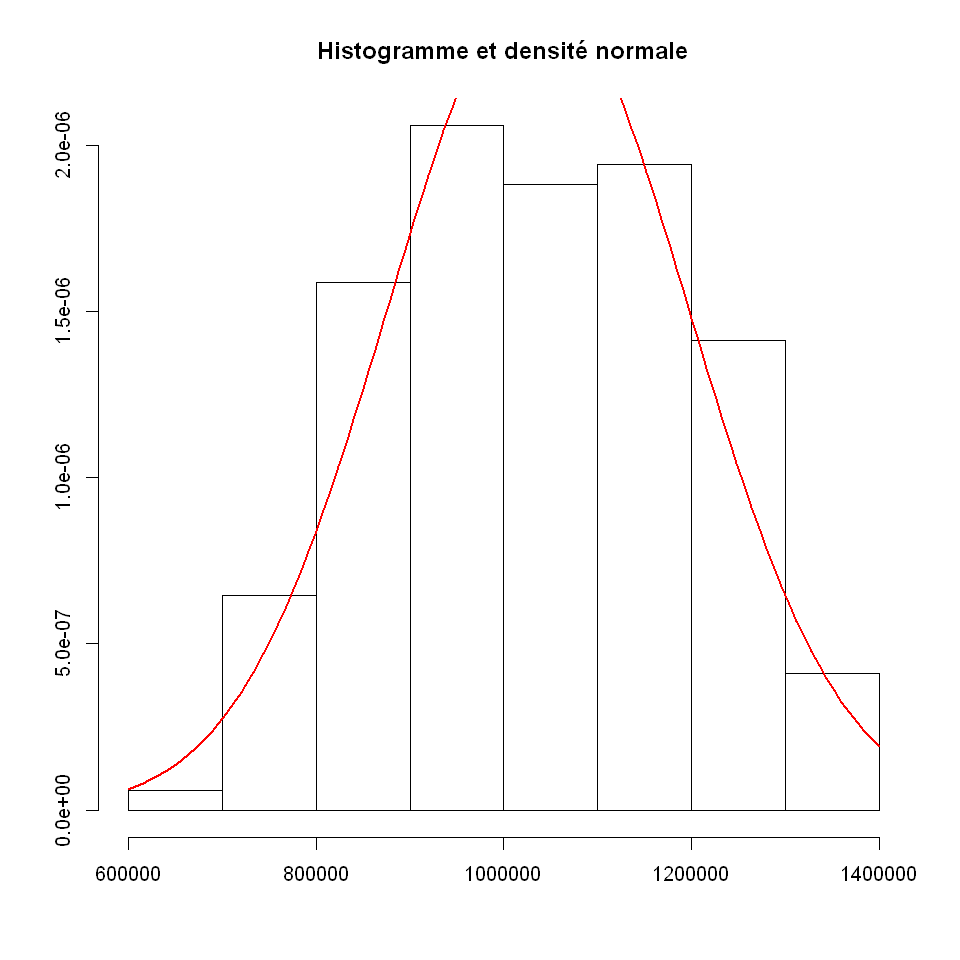

In [68]:
xbar <- mean(etude_marche$dispo_kcal_pers_an_2013)
round(xbar,digits=2)


sprime <- sd(etude_marche$dispo_kcal_pers_an_2013)
round(sprime,digits=2)


sprime2 <- var(etude_marche$dispo_kcal_pers_an_2013)
round(sprime2,digits=2)


n_etude_marche <- dim(etude_marche)[1]
v <- sprime2*(n_etude_marche-1)/n_etude_marche
round(v,digits=2)


hist(etude_marche$dispo_kcal_pers_an_2013,prob=TRUE,xlab="",ylab="",main="Histogramme et densité normale")
curve(dnorm(x,mean=xbar,sd=sprime),col="red",lwd=2,add=TRUE,yaxt="n")

La variable "dispo_prot_kg_pers_an_2013" suit une loi normale.

# B. Tests statistiques

La variable observée est continue et l'échantillon comprend de nombreux individus, nous retenons donc le test Kolmogorov-Smirnov.

L'hypothèse nulle correspond à une hypothèse de normalité, l'hypothèse alternative confirme un autre type de distribution.

Test d'adéquation de la variable "dispo_kcal_pers_an_2013" à une loi normale : 

In [69]:
ks.test(etude_marche$dispo_kcal_pers_an_2013,"pnorm",mean=mean(etude_marche$dispo_kcal_pers_an_2013),sd=sd(etude_marche$dispo_kcal_pers_an_2013))

Warning message in ks.test(etude_marche$dispo_kcal_pers_an_2013, "pnorm", mean = mean(etude_marche$dispo_kcal_pers_an_2013), :
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  etude_marche$dispo_kcal_pers_an_2013
D = 0.052944, p-value = 0.7273
alternative hypothesis: two-sided


On choisi un intervalle de confiance de 95%
Niveau test de 5% (alpha)

la p-valeur, est la probabilité pour un modèle statistique donné sous une hypothèse d'obtenir la même valeur ou une valeur encore plus extrême que celle observée.

La statistique D du test de Kolmogorov-Smirnov correspond à l’écart le plus élevé entre les deux courbes.  Plus cet écart est élevé, plus la p-valeur associée sera faible, et plus les deux distributions seront significativement différentes.

La p-valeur n’est pas inférieur à alpha, on ne peut pas rejetter l’hypothèse de normalité au niveau de test 5%.



On procède au test d'adéquation ensuite pour les clusters 3 et 5 car il représentent des opposés, le cluster 3 comprend des pays pauvres et le cluster 5 des pays riches. Par ailleurs seul les pays riches sont censé avoir une grande disponibilité alimentaire en kcal par personne. Si les clusters sont bien caractérisés, les distributions pour cette variable devrait différer entre les deux clusters. 

On vérifie que la distribution pour cette variable dans les clusters 3 et 5 suit une loi gaussienne : 

In [70]:
clust33 = filter(etude_marche_clust,clust == "3")

In [73]:
clust33

pays,dispo_prot_kg_pers_an_2013,ratio_prot_animal_prot_total_2013,dispo_kcal_pers_an_2013,population_diff_2012_2017,pib_habitant_2017_dollars,indice_stab_polit_et_secur_2016,distance_france_km,import_taux_evolution_2009_2013,taux_variation_change_euros_2009_2013,clust
Bélarus,34229700,58.59,1185885,-3392,5749.8147,0.12,-6105.437,23.08000,-203.84,3
Iran (République islamique d'),31846250,25.44,1127485,4709214,5679.6485,-0.74,-6105.437,240.00000,-78.40,3
Malawi,23553450,12.07,862860,2524799,340.4171,-0.06,-7617.569,57.11764,-146.69,3
Soudan,25801850,41.31,852275,4543138,2967.0834,-2.38,-4601.585,57.11764,-97.52,3
Venezuela (République bolivarienne du),26630400,52.26,961045,2083985,7977.3592,-1.03,-7619.687,12.50000,-169.20,3


In [71]:
clust55 =filter(etude_marche_clust,clust == "5")

In [74]:
ks.test(clust33$dispo_kcal_pers_an_2013,"pnorm",mean=mean(clust55$dispo_kcal_pers_an_2013),sd=sd(clust55$dispo_kcal_pers_an_2013))


	One-sample Kolmogorov-Smirnov test

data:  clust33$dispo_kcal_pers_an_2013
D = 0.76862, p-value = 0.001334
alternative hypothesis: two-sided


In [76]:
ks.test(clust55$dispo_kcal_pers_an_2013,"pnorm",mean=mean(clust55$dispo_kcal_pers_an_2013),sd=sd(clust55$dispo_kcal_pers_an_2013))

Warning message in ks.test(clust55$dispo_kcal_pers_an_2013, "pnorm", mean = mean(clust55$dispo_kcal_pers_an_2013), :
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  clust55$dispo_kcal_pers_an_2013
D = 0.13207, p-value = 0.5747
alternative hypothesis: two-sided


La p valeur pour les 2 clusters ne permet pas de rejeter l'hypothèse de normalité. 

On procède ensuite à un test de comparaison entre les clusters 2 et 5 pour la même variable.
Le signe de la différence potentielle n'est pas connu, nous ferons donc un test __bilatéral__.

In [77]:
var.test(clust33$dispo_kcal_pers_an_2013,clust55$dispo_kcal_pers_an_2013)


	F test to compare two variances

data:  clust33$dispo_kcal_pers_an_2013 and clust55$dispo_kcal_pers_an_2013
F = 3.999, num df = 4, denom df = 34, p-value = 0.01833
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  1.253212 33.742292
sample estimates:
ratio of variances 
           3.99897 


La p valeur est de 0.01833 ce qui est inférieur au seuil de 5%, donc on rejette l’égalité des variances au niveau de test 5%.

On peut confirmer cela en testant l'égalité des moyenne :

In [78]:
t.test(clust33$dispo_kcal_pers_an_2013,clust55$dispo_kcal_pers_an_2013,var.equal=TRUE)


	Two Sample t-test

data:  clust33$dispo_kcal_pers_an_2013 and clust55$dispo_kcal_pers_an_2013
t = -5.8362, df = 38, p-value = 9.552e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -328562.3 -159328.0
sample estimates:
mean of x mean of y 
   997910   1241855 


Encore une fois la p valeur permet de rejetter l'égalité des moyennes pour au niveau de test 5%.

On a rejeté l’hypothèse d’égalité des moyennes et de variances, les clusters sont donc bien caractérisés.